# Imports

In [4]:
import librosa, scipy as sp, numpy as np, matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.fftpack import fft, ifft
from scipy.signal import hamming, boxcar, chirp, hilbert

In [41]:
mod, sr = librosa.load('modulator22.wav')
car, sr = librosa.load('carrier22.wav')

car = car[:len(mod)]

modstft = librosa.core.stft(mod, 2048, 1024)
carstft = librosa.core.stft(car, 2048, 1024)

car0 = carstft[:, 0]
mod0 = modstft[:, 0]

Audio(car, rate=sr)

### MATLAB CODE

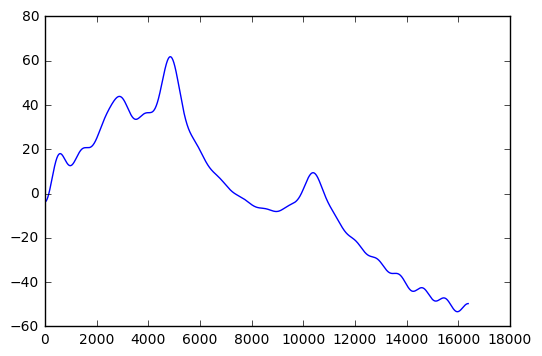

In [6]:
copied = "[1 1.99127755431616 1.52322532683015 0.300400797864546 -1.01744128975741 -2.18471779128151 -2.06687830974062 -0.682964613521455 0.492767334233552 1.00020946049751 0.967247647566375 0.284870929979433 -0.277895625531421 -0.0294488597559319 0.389748485684891 0.433487953664899 0.156117364560744 -0.541770938493989 -1.24045701662381 -1.13025389923326 -0.341953913267326 0.478349105683952 1.01040889347814 0.916885435964307 0.205173794564919 -0.41813252361207 -0.525825842122683 -0.305423606035422 0.0386680299197665 0.20578989519217 -0.0670915645894271 -0.468934930986799 -0.537730083755975 -0.251706030127586 0.233705736800416 0.642339405122929 0.602224304577419 0.12359255912862 -0.363305716169437 -0.591340326988468 -0.441218143227126 1.00730002152884 2.30242827966053 1.78629346337822 0.329038649903399 -1.21079023735164 -2.40844662581053 -2.03777366407598 -0.3662072977763 0.844551749491826 1.13213861177422 0.775489619930448 -0.135506964520595 -0.627365275335812 -0.0675976714755624 0.62953168990703 0.744701532871621 0.326896966246569 -0.617462810269887 -1.4513909179809 -1.25348338523699 -0.273915454228807 0.665046259231818 1.15736779560277 0.876306164600781 -0.0191725436919302 -0.653681502393075 -0.596154202891642 -0.170324054114777 0.28432607962134 0.384785931942383 -0.0774186535426777 -0.631019069060429 -0.702707029202302 -0.300505328251074 0.325016343820183 0.779409740843763 0.655584037972254 0.0396099643051559 -0.504625139988643 -0.684826994251971 -0.378418617133722 1.21456457606246 2.4545410769772 1.77175542593947 0.180004355365033 -1.40990536291152 -2.51977183657979 -1.96495295056531 -0.19964622259705 0.962383604642549 1.14053817561091 0.679423745045014 -0.254944013254007 -0.647056992834114 0.023240772367443 0.737479567685737 0.787015040605233 0.266631215544977 -0.750166615940866 -1.54538832306328 -1.23346855666157 -0.169075309200719 0.776319780047906 1.20172987469313 0.819524107476779 -0.121124090460044 -0.710594057533933 -0.572932936088426 -0.0970519118810853 0.348869480241549 0.380293851056564 -0.148422942876782 -0.704718606778312 -0.718483327940021 -0.250367925193831 0.408296700298309 0.829159721163778 0.635146085668333 -0.0322881568420226 -0.563314253351902 -0.701382243421404 -0.31248223735268 1.33195922719239 2.48548445959923 1.69963500722846 0.0757729844137055 -1.49905102166675 -2.5317164017008 -1.87140800371637 -0.0965648924861754 0.995664584910596 1.11105333026357 0.611711515001897 -0.311407009535848 -0.62874116262898 0.0889784878109547 0.778551592698269 0.777983241680429 0.212440932261514 -0.82037981078012 -1.56520154060946 -1.18395416287221 -0.0985704293503052 0.820481053050664 1.19648236657602 0.763894365438351 -0.178001198795796 -0.720382634162611 -0.539864319428571 -0.0548340723315046 0.370722509125074 0.358750774405233 -0.194544116623027 -0.731198170755367 -0.703546514198247 -0.209933098248402 0.449248315140764 0.835892189722538 0.602957326584938 -0.0780108359192971 -0.581502560059622 -0.695065197857681 -0.253943323422497 1.41759608984191 2.48825405186438 1.62831596968625 -0.0027015312440128 -1.56083003581127 -2.53514904231583 -1.7963880278898 -0.0250906611525826 1.01139441111294 1.09100071272835 0.570663699237801 -0.343633269270257 -0.606719153885371 0.135381307137768 0.794979026149106 0.75920051001998 0.168601217835941 -0.869516527049675 -1.57050765427852 -1.13906359089383 -0.0472147064398414 0.847837998640367 1.18961158290359 0.722764943827899 -0.215444054185293 -0.721551412092326 -0.51549283455167 -0.0303019497493337 0.379790009341856 0.338505888535746 -0.226969409474317 -0.743291230609145 -0.685481237886302 -0.178958895037751 0.476538710449562 0.835839041213812 0.576220043645908 -0.11056144029235 -0.59009513887427 -0.69012554901703 -0.203802015386752 1.49111060503638 2.48490113210207 1.56326943591449 -0.0700286707121738 -1.61614236797426 -2.53902080816015 -1.72887568797031 0.0375831967803758 1.0260408850574 1.07758072693032 0.536857216761739 -0.372597708136775 -0.588193564189234 0.17322414816532 0.805611289935 0.74224509800973 0.131335302178014 -0.911948639001541 -1.57356481225066 -1.09862195551717 -0.00287083635512969 0.871984667568498 1.1848035022192 0.686915269376839 -0.248332518860077 -0.722999520585463 -0.496078369020945 -0.0105596723024766 0.387788712068781 0.321466668566057 -0.254166076632424 -0.752300342897578 -0.669219389267543 -0.152569016602079 0.500077998544464 0.835507531152634 0.552682614493355 -0.138887300472046 -0.597391131281237 -0.68734606092384 -0.155008090806762 1.56158613154332 2.4797377402078 1.50085153137095 -0.134574856959 -1.671143477324 -2.54274904703049 -1.66271822456489 0.098000008351319 1.04122182871271 1.06635739029025 0.503823121712044 -0.40137232953938 -0.570550831031926 0.208630615224597 0.815145896512117 0.726634652920056 0.0955680406261914 -0.953120816971923 -1.5760514880296 -1.05948431852923 0.0397065633450108 0.895981516636614 1.18065714147487 0.651985236811658 -0.280329705675798 -0.724786535667186 -0.478162649669661 0.00842436993605394 0.395995959043399 0.305272100147298 -0.280146282859711 -0.760678151004288 -0.653797330417181 -0.127270203458121 0.522971581847428 0.835270968105191 0.529850191585873 -0.166161153131469 -0.604776783219302 -0.685149407580051 -0.104632273286775 1.63079414819682 2.4722514752167 1.43862895406223 -0.198732881481181 -1.72610102404709 -2.54439074050851 -1.59552241614128 0.157260019745731 1.05592684410416 1.05500333689123 0.46990355464245 -0.429647504467739 -0.552005094879351 0.243426902297103 0.824039743521669 0.711087695612307 0.0594167304407079 -0.993904240509233 -1.57725617016093 -1.01998558824984 0.0818225116970668 0.919712318402033 1.17576250680493 0.61651173862789 -0.311837994702812 -0.726015223560572 -0.460291652074964 0.0274852620431716 0.403960319276124 0.288667722439199 -0.305936388255526 -0.768434255871819 -0.638248952522212 -0.101908900218688 0.545574441376978 0.834484227233583 0.506610708396418 -0.193024132328882 -0.612025822008265 -0.682468474711504 -0.051844285634351 1.6986322188834 2.46177961565859 1.37578196347787 -0.26287979452839 -1.78049975654647 -2.54305259191126 -1.5268695196895 0.215154305769924 1.06948360959827 1.04282915175024 0.43503433696223 -0.456812802996931 -0.53190672283439 0.277863933681886 0.832008872295113 0.694954842276376 0.0224255934206366 -1.03414402780888 -1.57665223785875 -0.979654235235398 0.123572995348356 0.942795356370947 1.16956464962512 0.580281930154717 -0.342615801449301 -0.726219214528932 -0.442115439098829 0.0465828696464778 0.41126134578555 0.271254033596875 -0.33161461976669 -0.775299505517809 -0.62218219330745 -0.0762598288091046 0.567722546905575 0.83278888472245 0.482682880074493 -0.219429466474051 -0.61890012074001 -0.678874539808832 0.00341348802767483 1.76473093968301 2.44806730546526 1.31220513358822 -0.326942593843548 -1.83397736641415 -2.53845545079714 -1.45688863864845 0.271426988118623 1.08167676526707 1.02972187913376 0.399388809325738 -0.48254372522461 -0.510160045186733 0.311826481314183 0.838864566321901 0.678043057608121 -0.0154150084455129 -1.07360662935456 -1.57404337862148 -0.938468789564269 0.164846017045099 0.965030549260571 1.16192035286185 0.543382201907668 -0.372469622142454 -0.725270040840795 -0.423627435060159 0.0655963232108163 0.417715868162655 0.252982670869079 -0.357078509718656 -0.781128809399526 -0.605515629099444 -0.0503442906113227 0.589263936535101 0.830071774579853 0.458058402716574 -0.245252386460435 -0.625324314680652 -0.674199566821747 0.0610348327873875 1.82880556977233 2.43110029998085 1.24798465693735 -0.390843460769175 -1.88634717177166 -2.53054252905516 -1.38578653048499 0.325942409980693 1.09249404794787 1.01569442938914 0.363099724406295 -0.506692730389345 -0.486829784692442 0.345186390031085 0.844549206330361 0.660322181496187 -0.054043553245931 -1.11213779402431 -1.56939254286298 -0.896512444362042 0.205557619874886 0.986345572538361 1.15281390334799 0.505922411945358 -0.401301073142582 -0.723168950779375 -0.404879256714512 0.084455477778775 0.423258703261456 0.233892183485403 -0.382238095797217 -0.78587467875173 -0.588264841610209 -0.0242083058485284 0.610113992753406 0.826319095141116 0.432782495343248 -0.270405554373674 -0.63130981929679 -0.668341473206313 0.120903585985454 1.89064827990494 2.41094822396429 1.18322549205054 -0.454550670195699 -1.93749376998087 -2.51930950352147 -1.31374906254505 0.378637322953475 1.10197828036107 1.00076039284326 0.326253954104146 -0.529177200888961 -0.462006339528066 0.377851077777065 0.849064411136699 0.641796556573234 -0.0934075102344 -1.14963351801449 -1.56271153489618 -0.853873061329982 0.245662567507812 1.00671362863782 1.14225188914171 0.467991622140454 -0.429058188191209 -0.719948856663261 -0.385913840583188 0.103125329694653 0.427861724351971 0.214029117997707 -0.407029990393116 -0.789528595282125 -0.570461322813865 0.00211514950887451 0.630222570044082 0.821541981688924 0.406899466685731 -0.294832130514206 -0.636893970107782 -0.6612023603687 0.18290927657875 1.95008741453324 2.38770161950428 1.11801846549658 -0.518056836687425 -1.98731784839846 -2.50476079123348 -1.2409425995273 0.429476749220086 1.11017812287309 0.984919510686447 0.288921707934543 -0.549931832613274 -0.435777754508084 0.409750210638776 0.852429042930333 0.62246965890391 -0.133464717430162 -1.18600846194935 -1.5540227104797 -0.810629118855828 0.285134022115785 1.02611699234529 1.13024042134408 0.429665976183606 -0.455704354696163 -0.715645908805586 -0.366762260509468 0.121582813288028 0.431504261613803 0.193435430793514 -0.431403686637397 -0.792093257519601 -0.552133416603564 0.0286016558043483 0.649551199986784 0.815753965391362 0.380448744320699 -0.318489593141505 -0.642116364335069 -0.652678563625691 0.246938204557746 2.00696716290616 2.36145590197533 1.05244214784906 -0.581361484188027 -2.03571890465839 -2.48690532328764 -1.16752511726192 0.478436150370998 1.11713848734249 0.968163989384541 0.251172146452123 -0.568896469478576 -0.408229861390166 0.440823386616485 0.854665083130314 0.602339988102267 -0.174175087147475 -1.22118270999996 -1.54335100518182 -0.766853289414884 0.323951616590345 1.04453697986816 1.11678483522391 0.391017503630974 -0.481207528441618 -0.710295388871277 -0.347449442453262 0.139806428566077 0.434166728250508 0.172150626855542 -0.455312861113028 -0.793574515048341 -0.533305312869457 0.0552287223844477 0.668064854095754 0.808967307557608 0.353468834043173 -0.341342221305019 -0.647012796582696 -0.642662801347547 0.312867360003409 2.06114178358008 2.33230960184384 0.986567417750206 -0.644464093875976 -2.08259263370807 -2.46575923917907 -1.09365154071183 0.525496866489913 1.1229008285967 0.950483623539593 0.213078223473289 -0.586015154255899 -0.37944922243748 0.471015220382067 0.855794740078837 0.581402921488859 -0.215496127870056 -1.2550785311663 -1.53072393294233 -0.722615755207462 0.362097385309697 1.06195278024475 1.10189212820271 0.352117734302895 -0.505538045693776 -0.703932610413243 -0.327997535323594 0.157773367098758 0.435830630418388 0.150214197869655 -0.47871240458735 -0.793980176964335 -0.513998602856054 0.0819727848770541 0.685730256547952 0.801193526730529 0.325999851310983 -0.363359114247741 -0.651614325475772 -0.631046979286741 0.38056255158612 2.11247511155291 2.30036487491476 0.920459607804994 -0.707362138001548 -2.12783178242598 -2.44134776531066 -1.01947497235552 0.570645584078888 1.12750421900073 0.931867976047155 0.174717351864238 -0.601237130072102 -0.349524437573824 0.500274173332812 0.855840356061109 0.559652255946144 -0.257381531889764 -1.28762031933539 -1.51617238155764 -0.677985437068497 0.39955486541059 1.07834200023482 1.08557231639513 0.313038484634688 -0.52866869345614 -0.696593745137044 -0.308427075716 0.175459162220046 0.436479348837705 0.127666597890624 -0.501557895411582 -0.793320227634675 -0.494233195293815 0.108808342999752 0.702515992638834 0.792444036299792 0.298084406150099 -0.384514122627215 -0.655947092916205 -0.617724004734763 0.449878475834437 2.16084118221154 2.26572762180406 0.854179104882799 -0.770050572966867 -2.17132721841175 -2.41370587131332 -0.945146426171192 0.613874430772959 1.13098575161502 0.912307157144738 0.136171058614956 -0.614517598327849 -0.318546282301889 0.528552514304025 0.85482453649781 0.537080934889477 -0.299780964320047 -1.31873508294083 -1.49973093893231 -0.633030164811545 0.436308982312255 1.09368113846075 1.06783891192237 0.273851742794452 -0.550575005401854 -0.688316052848343 -0.288757268154982 0.192837840766049 0.43609860710547 0.104549421833561 -0.523805720747158 -0.791607007362295 -0.474027628026141 0.13570783314468 0.718392819415697 0.782730389147278 0.269767764971765 -0.404786139132945 -0.660031992838292 -0.602589016956213 0.520659378875083 2.2061248130681 2.22850715464922 0.78778142755845 -0.832521552797588 -2.21296874281877 -2.38287834337272 -0.870814249368055 0.65518094156096 1.13338051710622 0.89179219829115 0.0975245532248206 -0.625818113060236 -0.286607415545697 0.555806446744336 0.852770088044059 0.513681393108098 -0.34264015814866 -1.34835286037788 -1.48143788034382 -0.587816529154255 0.472345989650196 1.10794584411 1.04870904703423 0.234629398221972 -0.571235422501687 -0.679137804956708 -0.269006055792759 0.209882069674198 0.43467668121954 0.0809053313590933 -0.545413269106756 -0.788855208675213 -0.453399148070614 0.162641663682927 0.733333869028462 0.772064317406627 0.241097795359558 -0.424159335035231 -0.663884205127662 -0.585540422440002 0.592739853475764 2.24822199840398 2.18881567466877 0.721317219206827 -0.894764107694203 -2.25264575937286 -2.34891965523392 -0.796623562733002 0.694567878573659 1.13472144458141 0.870315370007858 0.05886634420082 -0.635106790925104 -0.253801993250054 0.581996187300083 0.849699835488815 0.489445800083709 -0.385901053242984 -1.37640702534162 -1.46133502565414 -0.542409689280498 0.507653346856029 1.12111108158514 1.02820349802813 0.195442993243913 -0.590631354174437 -0.669098111657184 -0.249190187955995 0.226563255790597 0.432204498462312 0.0567779394815437 -0.566339090884919 -0.785081770293218 -0.432363751053663 0.189578269487276 0.747314758947849 0.760457722003286 0.212124855861934 -0.442623296253907 -0.66751270694851 -0.566480887967334 0.665945677399843 2.2870401694665 2.14676770672193 0.654832273068887 -0.95676379324736 -2.29024790752543 -2.31189376614005 -0.72271576297774 0.732042979575843 1.13503913176651 0.847870514297441 0.0202878732109595 -0.642358443624225 -0.22022528270283 0.607085990027495 0.845636400853466 0.4643662995091 -0.429501940784355 -1.40283453175909 -1.43946756179101 -0.496873198039582 0.542219555039061 1.13315127990265 1.00634668306191 0.156363507586327 -0.608747198571509 -0.658236731396787 -0.229325317087499 0.242851632857682 0.428675697042349 0.0322117043132425 -0.586543036144984 -0.780305728923057 -0.410936238216861 0.216484173791847 0.760313650483021 0.747922672259625 0.18290165923442 -0.460173078890963 -0.6709198222362 -0.545318323125561 0.740094690366717 2.32249836440025 2.10247953944745 0.588367601581872 -1.01850234360095 -2.32566570103163 -2.27187387234933 -0.649228074151945 0.767618677375833 1.13436169872723 0.824453388122189 -0.0181168624743906 -0.647554668736874 -0.185973291035553 0.631044137085321 0.840601981660881 0.438435263749499 -0.473377621412821 -1.42757612779874 -1.41588385767879 -0.451268847423244 0.5760339759338 1.14404049382592 0.98316664473023 0.117461162145298 -0.625570348551706 -0.646593881284189 -0.209426118442148 0.258716357594712 0.424086667450353 0.00725183492662195 -0.605986385392977 -0.774548052094285 -0.389130299683316 0.243324066756467 0.772311275726432 0.734471429933014 0.153483106067244 -0.476809198636438 -0.674100832173349 -0.521966846542921 0.814997714252794 2.35452732608687 2.05606868138902 0.521959543424172 -1.07995734739641 -2.35879117872669 -2.22894211322222 -0.576293137360337 0.801311804843553 1.13271466977179 0.800062006439123 -0.0562517096406111 -0.650683906019894 -0.151142405302491 0.653842907570565 0.834618139554916 0.411645560835691 -0.51745958498546 -1.45057654852706 -1.39063527569621 -0.405656529351438 0.609086645676829 1.1537525812287 0.958695015102538 0.0788052339569912 -0.641091190600024 -0.634210050333381 -0.189506424531989 0.274125621994057 0.418436578711996 -0.0180557947787692 -0.624631979921427 -0.767831458479203 -0.366958621287292 0.270060906456573 0.783290939114711 0.720116498233617 0.123926084350396 -0.492537558615362 -0.677043654960582 -0.496347724135976 0.89045951473002 2.38306953365613 2.0076533342229 0.455639903295882 -1.14110195461161 -2.38951856350858 -2.18318923100331 -0.504038635226437 0.833143289461375 1.13012088272694 0.774696977317915 -0.0940187813352102 -0.651741459116007 -0.115829042095181 0.675458528420466 0.827705602056007 0.383990829189569 -0.561676214338134 -1.47178468868018 -1.36377597915826 -0.360094109374736 0.6413680879349 1.16226139504768 0.93296696113018 0.0404638798702292 -0.655303097365113 -0.621125815322773 -0.169579369864351 0.289046782429725 0.411727389111954 -0.0436647268524327 -0.642444352715362 -0.760180227553282 -0.344433011621839 0.296656043556222 0.793238495065066 0.704870693962344 0.0942892336063386 -0.507369316121214 -0.679728599403898 -0.468390268841737 0.966279798242882 2.40807917007609 1.95735188347734 0.389436122279704 -1.2019046182906 -2.41774492368822 -2.13471418548418 -0.432586950922074 0.863137838740481 1.12660042511818 0.748361824675816 -0.131318898874395 -0.650729482231775 -0.0801293066412712 0.695871108319086 0.819884078676569 0.355465756332213 -0.605953012491679 -1.49115375509759 -1.33536273547282 -0.314637313070804 0.67286912858126 1.16954098738427 0.906021110005151 0.00250396865436458 -0.668202413167679 -0.607381659820313 -0.149657543448087 0.303446504293854 0.403963841145892 -0.069527995890868 -0.659389858952445 -0.751620000025027 -0.321564546733003 0.323069368801257 0.80214230242938 0.688747240946373 0.0646326743127623 -0.521320688036336 -0.68212819602814 -0.438032692813417 1.04225423660961 2.42952202805884 1.90528240767416 0.323371477822825 -1.26232887406788 -2.44337083107781 -2.0836237261851 -0.362054862394934 0.89132361766957 1.12217059748217 0.721063295337526 -0.168052050235399 -0.647656932080317 -0.0441386622594791 0.715064554866897 0.811172092679431 0.326066358607022 -0.650212851702241 -1.50864139834356 -1.30545471518883 -0.269339625739251 0.703580713704968 1.17556582351017 0.877899455006001 -0.0350090782326472 -0.679788431860092 -0.593017797578352 -0.129753147112057 0.317290920512918 0.395153441047467 -0.0955982020883212 -0.675436804655088 -0.742177570824839 -0.298363730221064 0.349259481677409 0.809993156856725 0.671759883002913 0.0350177044113401 -0.534412695293156 -0.684207108966638 -0.405222904009145 1.1181755111235 2.44737535699483 1.85156220710886 0.257465312602733 -1.32233316011003 -2.46630101050818 -2.03003192537435 -0.292553272331721 0.917731919558877 1.11684590426584 0.692811647460492 -0.20411786136178 -0.642539485945201 -0.00795161123869208 0.733026475287931 0.801586829910077 0.295790259231511 -0.694376242441097 -1.52420982333164 -1.27411328741512 -0.224252206149246 0.733493732777861 1.18031100366162 0.848647242763384 -0.0720114370412478 -0.690063366581103 -0.578074001759941 -0.109878157716562 0.330545802236057 0.385306423622961 -0.121827581302568 -0.690555571985422 -0.731880676757513 -0.274840666475449 0.375183878233084 0.816784202600304 0.653923014458675 0.00550646532951338 -0.546670847533792 -0.68592213123449 -0.369919239742217 1.19383436802539 2.46162765407069 1.79630735349181 0.191733291398755 -1.38187067991293 -2.48644497565597 -1.97405967556634 -0.224186974116866 0.942396831759141 1.11063807269877 0.663620917480291 -0.239416076899762 -0.635399427050894 0.0283386118593703 0.749748061081945 0.79114400613912 0.264636962049224 -0.738361620266715 -1.5378258790124 -1.24140181216081 -0.179423815050384 0.762598848844309 1.18375249050779 0.818312843061027 -0.108441023239046 -0.699032311023248 -0.562589441500962 -0.0900444912617774 0.343176739919374 0.37443570332799 -0.148168072777288 -0.704718739664275 -0.72075778110708 -0.251005244613637 0.400799155824327 0.822510825674291 0.635251825945152 -0.0238384195372903 -0.558124769911302 -0.687222265203728 -0.332091130368003 1.26902067730747 2.47227840303997 1.73963226158056 0.126187684883122 -1.44088931013514 -2.50371764620103 -1.91583415534999 -0.157054453784449 0.965354897781704 1.10355609986794 0.633509162856424 -0.273847046852887 -0.626265498655662 0.0646403335786222 0.765223957132016 0.779857754257802 0.23260811837313 -0.782085648449464 -1.5494611273543 -1.2073854301447 -0.134900759060802 0.790886337595398 1.18586734014601 0.786947602414626 -0.144237624186521 -0.706703191877766 -0.546602527299839 -0.0702641668468959 0.355149332945401 0.36255681266152 -0.174571385239599 -0.717901196977374 -0.70883785757691 -0.226867330520913 0.426061232330094 0.827170530563838 0.615762462857825 -0.052954230466688 -0.568807774736243 -0.688048889240645 -0.291719686929732 1.34352448696299 2.47933776434176 1.68164928381442 0.0608376790242818 -1.49933155532088 -2.5180399414625 -1.85548826753294 -0.091247727723167 0.98664477735076 1.09560632800989 0.602498678040048 -0.307312215621094 -0.615172728459063 0.100863720847565 0.779452115874665 0.767740532530834 0.199707784343405 -0.825463534115696 -1.55909189197541 -1.17213085060485 -0.0907268504465947 0.818345937129278 1.18663393442638 0.754605682763581 -0.179343023111819 -0.713086712144726 -0.530150766666934 -0.0505494684055982 0.366429385835757 0.349687829051694 -0.200989062151683 -0.730080249824559 -0.696150176001633 -0.202436964256318 0.450925577185867 0.83076280293328 0.595472193565401 -0.0817785573065214 -0.578756381389694 -0.688336010569941 -0.248798207287061 1.41713706501548 2.48282622044138 1.62246832886885 -0.00431029142163657 -1.55713455101453 -2.52933934586053 -1.79316005372254 -0.026852215701512 1.00630690592485 1.08679254783755 0.570616181284812 -0.339714609885186 -0.602162225076158 0.136921045471754 0.792433637229875 0.754803054959269 0.165942666289211 -0.868409355605681 -1.56669928690999 -1.13570613764643 -0.0469433832106505 0.844966710120152 1.18603221240287 0.721343886708465 -0.213701114571695 -0.718196285034912 -0.51327063140116 -0.0309131021550484 0.37698310905597 0.335849291491603 -0.227372546932723 -0.741235717284737 -0.682724092290563 -0.177724559995085 0.475347451426658 0.833288960991102 0.574399584200164 -0.110249721346168 -0.588009788615614 -0.688010603532153 -0.203332596017672 1.48965192193137 2.48277418038297 1.56219650495321 -0.0692521870774971 -1.61423011637781 -2.53755044176441 -1.72899208953115 0.0360533514089323 1.02438315522641 1.07711612949551 0.537892970136343 -0.370959321824056 -0.587280948462369 0.17272693323974 0.804172595071572 0.741054244622295 0.13132235166919 -0.910836398679705 -1.57226922608073 -1.09818049565276 -0.00358912578595154 0.870736920013408 1.18404389870731 0.687221470788476 -0.24725801163449 -0.722047958240243 -0.495997437773195 -0.0113683477325285 0.386777322372065 0.321064108242513 -0.253673248975876 -0.751350017197914 -0.668588845040321 -0.152741105618634 0.499282153800778 0.834751998327332 0.552564676639763 -0.138307208515404 -0.596609303958432 -0.686993031498418 -0.155341694184441 1.56086580636166 2.47922154762974 1.50093778860748 -0.133985987734559 -1.67054485701608 -2.54261540556169 -1.66313086464468 0.0973969899955689 1.040916496327 1.06657618052074 0.504365043679295 -0.400953984217223 -0.570581456292962 0.208198597122785 0.814675851119566 0.726501210689909 0.0958595232871544 -0.952657499177448 -1.57579241414705 -1.05962405430865 0.0392996694832012 0.895643922740382 1.18065272668083 0.652299948352233 -0.279962145046252 -0.724660328408564 -0.478365240789761 0.00807079894483938 0.395779658708551 0.305357456958276 -0.279842611283094 -0.760408239334504 -0.653773361213227 -0.127498359046045 0.522685269940411 0.835156421170483 0.529989166131326 -0.165892108947963 -0.604597735726537 -0.685197549824909 -0.104857515904413 1.63057966755089 2.4722172553044 1.43879271969197 -0.198511297948987 -1.7260003182976 -2.54448446308637 -1.59572615199598 0.157113489082288 1.05595066684103 1.05516972995937 0.470073189886826 -0.429609234073177 -0.552121628393535 0.243256054117 0.823952857224442 0.711149249595982 0.0595701546178145 -0.993785389723639 -1.57726431946555 -1.02010765379109 0.081689240024991 0.919674075304205 1.17584465414927 0.61664288360209 -0.311764354666942 -0.726054445736554 -0.460406743592913 0.0273894929746887 0.403958766475445 0.288756678607352 -0.305832180503693 -0.768398204803365 -0.638306073195339 -0.102009038427667 0.545512921525887 0.834508083079964 0.506696574889247 -0.192947557691516 -0.612018753414136 -0.682532886352897 -0.0519253895129835 1.69859957820244 2.46181877294237 1.37585812320704 -0.262828936851695 -1.78051318901656 -2.54311630088293 -1.52693037025092 0.215144403783383 1.06952984378735 1.0428919375591 0.435063036698986 -0.456839161544049 -0.531964371383637 0.277822325349774 0.832015447118016 0.695001870651344 0.0224736842355069 -1.03413304809297 -1.57668512996561 -0.979702630709036 0.123548269977249 0.942812662429483 1.16960806981114 0.58031567841088 -0.342617973462209 -0.726253708671747 -0.44215322290545 0.0465719196858304 0.411284508369199 0.271291166556507 -0.331593680120183 -0.775310510464955 -0.622214749433287 -0.0762870033791013 0.567722012390258 0.832814020125586 0.482712417944039 -0.219419171150476 -0.61891622301778 -0.67890289513456 0.00339599799481222 1.76473761207485 2.44809158883275 1.31222685854168 -0.326940514780226 -1.83399555480635 -2.53847843015769 -1.45689794375403 0.271438018004888 1.08169832368677 1.02973632673639 0.399385065760612 -0.482561741039389 -0.510177305755162 0.311823619121531 0.838877618795566 0.678060846163114 -0.015406832472249 -1.07361404487785 -1.57405969278722 -0.93848060539734 0.164847830613059 0.965043842295077 1.16193398830538 0.543385353501058 -0.372478904340405 -0.725283748818554 -0.423634471286075 0.0656011874094233 0.417728154720944 0.252992252158823 -0.357079087450798 -0.781138557250181 -0.60552634070852 -0.050347424540973 0.589270468554613 0.830082289585326 0.458064357512937 -0.245255473725002 -0.625333524115373 -0.674207278263917 0.061034653686116 1.82881267111994 2.43110867195263 1.24798759670504 -0.390847999549604 -1.88635520026828 -2.53054750066237 -1.3857846639717 0.325949277663695 1.09250021146416 1.01569503978272 0.363094588055194 -0.506699241625057 -0.486832437626585 0.345189496617109 0.844555308796964 0.660326285900791 -0.0540445959303593 -1.11214288816599 -1.5693974385637 -0.896513271199122 0.205561304638735 0.986350612180043 1.15281623214505 0.505920325553854 -0.401305690100781 -0.723172306233488 -0.404878756780619 0.084459235288355 0.423262569553076 0.233893088136914 -0.38224071505326 -0.785878561440982 -0.588266843925749 -0.0242069388840297 0.610117469277022 0.8263218151283 0.432782342221233 -0.270408309047904 -0.631312855930955 -0.668342369946386 0.120905428130471 1.89065125753267 2.41094991739991 1.18322462606163 -0.454553275361906 -1.93749595833478 -2.51930956218024 -1.31374705634874 0.378639695770725 1.10197911972681 1.00075911356336 0.326251681004851 -0.529178613988791 -0.462005817427318 0.37785302006111 0.849066159741639 0.641796735522085 -0.0934089607462863 -1.14963536301216 -1.56271229125618 -0.853872186405175 0.245664294900905 1.00671479465534 1.14225159884442 0.467990181775383 -0.429059576740927 -0.719949095416312 -0.385912800386397 0.103126757432213 0.42786238761784 0.214028530986621 -0.407031297010992 -0.789529548151183 -0.570461185097385 0.00211621163754273 0.630223666328177 0.821542241334121 0.406898727610545 -0.294833230245744 -0.636894539898662 -0.661201976255515 0.182910260247973 1.95008818667242 2.38770157910357 1.11801768705486 -0.518057697528041 -1.9873181049511 -2.5047602717186 -1.24094175632466 0.42947723079425 1.11017787998445 0.984918773739847 0.288921086924317 -0.549931851480997 -0.435777187754251 0.409750883141765 0.852429282569137 0.62246929834728 -0.133465360998092 -1.18600886358483 -1.55402256445688 -0.810628569552911 0.285134518191918 1.0261170447428 1.13024001172007 0.429665453393161 -0.455704570328014 -0.715645662406489 -0.366761771549032 0.1215831445373 0.431504180819058 0.193435023539301 -0.431404080459788 -0.792093326433666 -0.552133122966072 0.0286020602782792 0.649551388881174 0.815753800240512 0.380448374544713 -0.318489863729093 -0.642116326427475 -0.652678263397726 0.246938515406849 2.00696723741507 2.36145569343623 1.05244183636453 -0.581361646326558 -2.03571879673266 -2.48690504496653 -1.16752489807473 0.478436139768124 1.11713826736631 0.968163745352433 0.251172073063168 -0.56889632296968 -0.408229622613994 0.440823523561732 0.854665015012853 0.602339779637348 -0.17417526337576 -1.22118271598268 -1.54335084507598 -0.766853098816653 0.323951685001995 1.04453687825127 1.11678465301705 0.391017389480269 -0.481207487607639 -0.710295233522761 -0.347449301719235 0.139806443891337 0.4341666125744 0.172150478720969 -0.455312922584865 -0.793574445659615 -0.533305174464436 0.0552288164859228 0.668064831616525 0.80896719241082 0.353468722348401 -0.341342241189024 -0.647012713693434 -0.642662686762826 0.312867413796715 2.0611417371183 2.33230949719724 0.98656734091244 -0.644464083450185 -2.08259254884469 -2.46575915103935 -1.09365151933436 0.525496807649365 1.12290074037364 0.950483577403289 0.21307825379533 -0.586015075508218 -0.379449160217984 0.471015217616621 0.855794677917623 0.581402852311188 -0.215496148861056 -1.25507848985013 -1.53072386532683 -0.722615716265493 0.362097366208123 1.06195272127531 1.10189207819374 0.352117732427499 -0.505538000465128 -0.703932556395029 -0.327997515794906 0.157773338460628 0.435830578832498 0.150214165427123 -0.478712393170439 -0.793980133030676 -0.513998562931112 0.0819727893547842 0.685730223882065 0.801193484756544 0.325999833787698 -0.363359094707924 -0.651614286299289 -0.631046952554904 0.380562545333824 2.11247507899681 2.30036484323665 0.920459602069894 -0.707362114603588 -2.12783174996517 -2.44134774999211 -1.01947498542603 0.570645554464103 1.12750419718172 0.931867978912062 0.174717375851766 -0.601237105080726 -0.349524431441421 0.500274156731015 0.855840331073596 0.55965224281861 -0.257381523371244 -1.28762029705494 -1.51617236389616 -0.67798543778465 0.399554847845098 1.07834198062469 1.08557231039199 0.313038496285882 -0.528668674309244 -0.696593734063776 -0.308427081072009 0.175459145539143 0.436479334646668 0.127666597308366 -0.501557882634937 -0.7933202123253 -0.494233189719604 0.108808334929104 0.702515978034155 0.792444027079571 0.298084409341586 -0.384514110202675 -0.655947081590072 -0.617724003427748 0.449878466610061 2.16084117031841 2.26572761680929 0.854179110385136 -0.770050561877768 -2.1713272108181 -2.41370587305176 -0.945146435375845 0.613874421788815 1.13098574996151 0.912307163749401 0.136171067810693 -0.614517593965776 -0.318546285978545 0.528552505923288 0.854824530302222 0.537080935676006 -0.29978095753985 -1.31873507585483 -1.49973093717345 -0.633030169495586 0.436308975235143 1.0936811347256 1.06783891431525 0.273851749098229 -0.550575000388578 -0.68831605303211 -0.288757273118448 0.192837835207232 0.436098605388866 0.104549425119081 -0.523805715325346 -0.791607004213641 -0.474027629527709 0.135707828426264 0.718392815388802 0.782730388967839 0.269767768580898 -0.404786134794276 -0.66003199124748 -0.602589019230678 0.520659374740264 2.20612481044776 2.2285071555413 0.787781431072215 -0.832521549584453 -2.21296874243747 -2.38287834597741 -0.870814252737913 0.655180940137169 1.13338051865534 0.891792201429697 0.0975245553817441 -0.625818113543437 -0.286607418148064 0.555806444196457 0.852770087567616 0.513681394972548 -0.342640155543564 -1.34835285913578 -1.48143788137809 -0.587816531526129 0.472345987890773 1.10794584432562 1.04870904895061 0.234629400231152 -0.571235421997151 -0.679137806278145 -0.269006057797193 0.209882068611477 0.434676681891743 0.0809053331426991 -0.545413267683621 -0.788855208721777 -0.453399149473146 0.162641662107071 0.733333868537481 0.772064318332923 0.241097796894701 -0.424159334139979 -0.663884205548512 -0.585540423774524 0.592739852333285 2.24822199834917 2.18881567568823 0.721317220436315 -0.894764107240327 -2.25264576001391 -2.34891965640453 -0.796623563477631 0.694567878822967 1.13472144557507 0.870315370919259 0.0588663443117471 -0.635106791660719 -0.253801994204822 0.58199618689443 0.849699835925209 0.489445800972241 -0.385901052630317 -1.37640702547607 -1.46133502639014 -0.542409690003263 0.507653346718647 1.12111108211139 1.02820349876614 0.195442993597598 -0.590631354465363 -0.669098112328438 -0.249190188455592 0.226563255849765 0.432204499004193 0.056777940051368 -0.566339090740278 -0.785081770666199 -0.432363751621636 0.189578269184673 0.747314759136581 0.760457722508007 0.212124856266059 -0.442623296265397 -0.667512707344751 -0.566480888414102 0.665945677259352 2.28704016972759 2.14676770715658 0.654832273323458 -0.956763793365275 -2.29024790790287 -2.31189376646419 -0.722715762994392 0.732042979863836 1.13503913211497 0.847870514426991 0.0202878730303296 -0.642358443955617 -0.220225282914421 0.607085990097135 0.845636401134492 0.464366299767736 -0.429501940751928 -1.40283453196675 -1.4394675620616 -0.496873198155318 0.542219555161816 1.13315128015411 1.00634668323598 0.156363507549092 -0.608747198779489 -0.658236731601717 -0.229325317127052 0.242851633006225 0.428675697251426 0.0322117044139896 -0.586543036226754 -0.780305729113028 -0.410936238358757 0.216484173808038 0.760313650636231 0.747922672421273 0.182901659275917 -0.460173078996264 -0.6709198223972 -0.545318323211792 0.740094690419638 2.32249836454307 2.10247953956226 0.588367601579176 -1.01850234371271 -2.32566570115803 -2.27187387238932 -0.649228074078275 0.767618677498838 1.1343616987994 0.824453388088903 -0.0181168625813125 -0.64755466882886 -0.18597329104049 0.631044137166851 0.84060198175982 0.438435263786575 -0.473377621463713 -1.42757612789266 -1.4158838577391 -0.451268847403941 0.576033976013169 1.14404049389922 0.983166644739657 0.117461162086754 -0.625570348628308 -0.646593881317179 -0.209426118407642 0.258716357665818 0.424086667499799 0.0072518349163601 -0.605986385451728 -0.774548052152379 -0.389130299694677 0.243324066798369 0.772311275785603 0.734471429961597 0.153483106044044 -0.476809198690376 -0.674100832213681 -0.521966846538459 0.814997714296206 2.35452732613284 2.05606868140093 0.52195954339441 -1.07995734744205 -2.35879117875128 -2.2289421132074 -0.576293137319914 0.801311804876127 1.13271466977105 0.800062006407421 -0.056251709676511 -0.650683906031295 -0.151142405281667 0.65384290760543 0.834618139575457 0.4116455608263 -0.517459585015822 -1.45057654855323 -1.39063527569769 -0.405656529328396 0.609086645704875 1.15375258123929 0.958695015088196 0.0788052339304383 -0.641091190617093 -0.634210050327948 -0.189506424509597 0.274125622014691 0.418436578714577 -0.0180557947953636 -0.624631979943046 -0.767831458488393 -0.366958621277426 0.270060906476677 0.783290939128649 0.720116498230639 0.123926084333696 -0.492537558631811 -0.677043654963809 -0.496347724124188 0.890459514746729 2.3830695336642 2.00765333421633 0.45563990328071 -1.14110195462293 -2.38951856350727 -2.18318923099099 -0.504038635213406 0.833143289464742 1.13012088271855 0.774696977305003 -0.0940187813422663 -0.651741459111906 -0.115829042083842 0.675458528429574 0.827705602055766 0.38399082918063 -0.561676214348178 -1.47178468868317 -1.36377597915209 -0.360094109364686 0.641368087940676 1.16226139504476 0.932966961121273 0.0404638798626234 -0.655303097365606 -0.621125815316203 -0.169579369856359 0.289046782432718 0.411727389107911 -0.0436647268599233 -0.642444352720118 -0.760180227551517 -0.344433011615237 0.296656043562224 0.793238495065798 0.704870693957409 0.0942892335998471 -0.507369316124058 -0.679728599401101 -0.468390268835861 0.966279798247086 2.40807917007544 1.95735188347274 0.389436122275122 -1.2019046182914 -2.41774492368471 -2.1347141854793 -0.432586950919766 0.863137838738496 1.12660042511369 0.748361824672466 -0.131318898874002 -0.650729482228063 -0.0801293066373835 0.695871108320106 0.819884078674162 0.355465756328548 -0.605953012493569 -1.49115375509623 -1.33536273546947 -0.31463731306824 0.672869128581026 1.16954098738153 0.906021110002181 0.00250396865357454 -0.668202413165763 -0.607381659817313 -0.149657543446375 0.303446504293099 0.403963841143446 -0.0695279958930106 -0.659389858952579 -0.7516200000232 -0.321564546730936 0.323069368801831 0.802142302428051 0.688747240944143 0.064632674311366 -0.521320688035806 -0.682128196026229 -0.438032692811667 1.04225423660995 2.42952202805762 1.90528240767245 0.323371477821988 -1.26232887406733 -2.44337083107658 -2.08362372618433 -0.362054862395341 0.891323617668242 1.122170597481 0.721063295337461 -0.168052050234378 -0.647656932079061 -0.0441386622590607 0.715064554866082 0.811172092678098 0.326066358606214 -0.650212851701973 -1.50864139834241 -1.30545471518769 -0.269339625738988 0.703580713704219 1.17556582350904 0.877899455005372 -0.0350090782323662 -0.679788431859201 -0.593017797577592 -0.129753147112001 0.317290920512273 0.395153441046659 -0.0955982020886329 -0.675436804654677 -0.742177570824128 -0.298363730220629 0.349259481677301 0.809993156856261 0.671759883002523 0.035017704411408 -0.534412695292649 -0.68420710896613 -0.405222904009033 1.11817551112315 2.44737535699427 1.85156220710853 0.257465312602898 -1.3223331601095 -2.46630101050769 -2.03003192537418 -0.292553272331884 0.917731919558637 1.11684590426573 0.692811647460574 -0.204117861361593 -0.64253948594515 -0.00795161123902056 0.733026475287452 0.801586829909832 0.295790259231661 -0.694376242440591 -1.52420982333107 -1.27411328741493 -0.224252206149587 0.733493732777252 1.18031100366116 0.848647242763377 -0.072011437040829 -0.69006336658067 -0.578074001759836 -0.109878157716876 0.330545802235517 0.385306423622555 -0.121827581302642 -0.690555571985204 -0.731880676757231 -0.274840666475352 0.375183878232913 0.816784202600083 0.653923014458541 0.00550646532953177 -0.546670847533645 -0.685922131234391 -0.369919239742275 1.19383436802524 2.4616276540706 1.79630735349189 0.191733291398961 -1.38187067991276 -2.48644497565603 -1.97405967556664 -0.224186974117203 0.942396831758935 1.11063807269875 0.663620917480447 -0.239416076899549 -0.635399427050808 0.0283386118593152 0.749748061081915 0.791144006139189 0.264636962049364 -0.738361620266533 -1.53782587901234 -1.24140181216097 -0.179423815050663 0.762598848844082 1.18375249050771 0.818312843061178 -0.108441023238774 -0.69903231102299 -0.56258944150075 -0.0900444912616898 0.343176739919339 0.374435703327949 -0.148168072777294 -0.704718739664267 -0.720757781107023 -0.251005244613559 0.400799155824332 0.822510825674311 0.635251825945209 -0.0238384195371705 -0.558124769911118 -0.687222265203542 -0.332091130367874 1.2690206773075 2.47227840303985 1.73963226158037 0.126187684882988 -1.44088931013519 -2.50371764620102 -1.91583415534998 -0.157054453784488 0.965354897781657 1.10355609986797 0.633509162856582 -0.27384704685271 -0.626265498655623 0.0646403335784141 0.765223957131631 0.779857754257455 0.232608118372991 -0.782085648449347 -1.549461127354 -1.20738543014442 -0.134900759060751 0.790886337595213 1.18586734014578 0.786947602414551 -0.144237624186335 -0.706703191877437 -0.546602527299654 -0.0702641668470568 0.355149332945027 0.362556812661212 -0.174571385239662 -0.717901196977184 -0.708837857576579 -0.226867330520712 0.426061232330052 0.827170530563682 0.615762462857695 -0.0529542304666964 -0.5688077747361 -0.688048889240478 -0.291719686929756 1.34352448696278 2.47933776434151 1.68164928381428 0.0608376790243517 -1.49933155532064 -2.51803994146229 -1.8554882675329 -0.0912477277232713 0.986644777350496 1.09560632800959 0.60249867803989 -0.307312215621084 -0.615172728458958 0.100863720847623 0.779452115874606 0.767740532530741 0.199707784343412 -0.825463534115557 -1.55909189197522 -1.17213085060476 -0.0907268504466424 0.818345937129096 1.18663393442614 0.754605682763487 -0.179343023111673 -0.713086712144529 -0.53015076666682 -0.0505494684056035 0.366429385835564 0.349687829051418 -0.20098906215178 -0.730080249824413 -0.69615017600137 -0.202436964256073 0.450925577185979 0.830762802933203 0.595472193565199 -0.0817785573067766 -0.578756381389861 -0.688336010569953 -0.248798207287003 1.41713706501555 2.48282622044144 1.62246832886886 -0.00431029142164246 -1.55713455101449 -2.52933934586048 -1.79316005372253 -0.0268522157015609 1.00630690592472 1.08679254783742 0.570616181284757 -0.339714609885175 -0.602162225076139 0.136921045471688 0.792433637229758 0.754803054959229 0.165942666289262 -0.868409355605559 -1.56669928690977 -1.13570613764626 -0.0469433832106694 0.844966710120059 1.18603221240277 0.721343886708386 -0.213701114571629 -0.718196285034753 -0.513270631401078 -0.0309131021550183 0.376983109055988 0.335849291491624 -0.227372546932674 -0.741235717284681 -0.682724092290539 -0.177724559995071 0.475347451426666 0.833288960991063 0.574399584200035 -0.110249721346306 -0.588009788615586 -0.688010603531963 -0.203332596017438 1.48965192193155 2.48277418038299 1.56219650495303 -0.0692521870777606 -1.61423011637799 -2.53755044176442 -1.72899208953101 0.0360533514091137 1.02438315522655 1.07711612949551 0.537892970136197 -0.37095932182422 -0.587280948462413 0.17272693323973 0.804172595071621 0.741054244622432 0.131322351669273 -0.910836398679693 -1.57226922608068 -1.09818049565277 -0.00358912578602109 0.870736920013449 1.18404389870745 0.687221470788557 -0.247258011634413 -0.722047958240201 -0.495997437773202 -0.0113683477325177 0.38677732237207 0.321064108242465 -0.253673248975908 -0.751350017197878 -0.668588845040225 -0.152741105618505 0.499282153800833 0.834751998327211 0.552564676639549 -0.138307208515576 -0.596609303958513 -0.686993031498382 -0.15534169418427 1.56086580636184 2.4792215476298 1.50093778860746 -0.133985987734643 -1.67054485701621 -2.54261540556173 -1.66313086464461 0.0973969899956082 1.04091649632694 1.0665761805206 0.504365043679093 -0.400953984217339 -0.570581456292856 0.208198597123005 0.814675851119778 0.72650121069001 0.0958595232870527 -0.952657499177686 -1.57579241414721 -1.05962405430859 0.0392996694833727 0.895643922740558 1.18065272668095 0.652299948352186 -0.279962145046388 -0.724660328408648 -0.478365240789803 0.00807079894475902 0.395779658708492 0.305357456958222 -0.279842611283201 -0.76040823933456 -0.653773361213193 -0.127498359046012 0.522685269940458 0.835156421170519 0.529989166131191 -0.165892108948215 -0.604597735726706 -0.685197549824939 -0.104857515904304 1.63057966755112 2.47221725530462 1.43879271969202 -0.198511297949104 -1.7260003182978 -2.54448446308656 -1.59572615199603 0.15711348908237 1.05595066684109 1.0551697299594 0.470073189886881 -0.429609234073121 -0.552121628393448 0.243256054117147 0.823952857224567 0.711149249595961 0.0595701546177125 -0.993785389723711 -1.57726431946559 -1.020107653791 0.0816892400251817 0.91967407530436 1.17584465414931 0.616642883602043 -0.311764354667051 -0.726054445736666 -0.460406743592955 0.0273894929747084 0.403958766475522 0.288756678607411 -0.305832180503688 -0.76839820480337 -0.63830607319533 -0.102009038427663 0.545512921525885 0.834508083079959 0.506696574889188 -0.192947557691582 -0.612018753414112 -0.682532886352757 -0.0519253895127882 1.69859957820263 2.46181877294246 1.37585812320693 -0.262828936851956 -1.78051318901686 -2.54311630088307 -1.5269303702508 0.21514440378367 1.06952984378762 1.04289193755921 0.435063036698901 -0.456839161544194 -0.531964371383707 0.277822325349772 0.832015447118097 0.695001870651437 0.0224736842355211 -1.034133048093 -1.57668512996559 -0.979702630708963 0.123548269977354 0.942812662429573 1.16960806981117 0.580315678410806 -0.342617973462314 -0.726253708671759 -0.442153222905398 0.0465719196858775 0.411284508369231 0.271291166556437 -0.331593680120372 -0.775310510465115 -0.622214749433295 -0.0762870033790321 0.567722012390373 0.832814020125698 0.48271241794398 -0.219419171150731 -0.618916223018037 -0.678902895134658 0.00339599799487578 1.764737612075 2.44809158883288 1.31222685854172 -0.326940514780282 -1.83399555480636 -2.53847843015757 -1.45689794375389 0.271438018004927 1.08169832368667 1.02973632673612 0.399385065760303 -0.482561741039487 -0.510177305755077 0.311823619121695 0.838877618795844 0.678060846163329 -0.0154068324721925 -1.07361404487786 -1.57405969278733 -0.938480605397534 0.164847830612955 0.965043842295096 1.16193398830551 0.543385353501341 -0.372478904340175 -0.725283748818554 -0.423634471286253 0.0656011874091597 0.417728154720725 0.252992252158802 -0.357079087450662 -0.781138557250074 -0.605526340708528 -0.0503474245410182 0.589270468554616 0.830082289585392 0.458064357513033 -0.2452554737249 -0.625333524115362 -0.674207278263994 0.0610346536861268 1.82881267112002 2.43110867195273 1.24798759670521 -0.390847999549483 -1.88635520026828 -2.53054750066232 -1.38578466397157 0.3259492776638 1.09250021146419 1.01569503978264 0.363094588054922 -0.506699241625329 -0.486832437626699 0.345189496617144 0.844555308797188 0.660326285901069 -0.0540445959302178 -1.11214288816596 -1.56939743856371 -0.896513271199126 0.205561304638771 0.986350612180123 1.15281623214513 0.505920325553832 -0.401305690100932 -0.723172306233646 -0.404878756780718 0.0844592352883511 0.42326256955318 0.233893088136989 -0.38224071505334 -0.785878561441183 -0.58826684392601 -0.0242069388842115 0.61011746927707 0.826321815128495 0.432782342221383 -0.270408309047836 -0.631312855931002 -0.668342369946513 0.120905428130435 1.89065125753278 2.41094991740003 1.18322462606167 -0.454553275361938 -1.93749595833483 -2.51930956218022 -1.31374705634862 0.378639695770828 1.10197911972675 1.00075911356312 0.326251681004544 -0.529178613988986 -0.462005817427353 0.377853020061206 0.849066159741843 0.641796735522238 -0.0934089607463199 -1.14963536301232 -1.56271229125636 -0.853872186405339 0.245664294900842 1.0067147946554 1.14225159884451 0.467990181775413 -0.429059576740945 -0.719949095416363 -0.385912800386501 0.103126757432117 0.427862387617831 0.214028530986642 -0.407031297011015 -0.789529548151271 -0.570461185097551 0.0021162116374344 0.630223666328227 0.821542241334274 0.406898727610647 -0.294833230245741 -0.636894539898764 -0.661201976255671 0.182910260247928 1.95008818667252 2.38770157910371 1.11801768705499 -0.518057697527978 -1.98731810495119 -2.50476027171874 -1.24094175632468 0.429477230794316 1.11017787998455 0.984918773739942 0.288921086924253 -0.5499318514812 -0.435777187754348 0.409750883141838 0.852429282569327 0.622469298347501 -0.133465360998013 -1.18600886358496 -1.55402256445706 -0.810628569553015 0.285134518191928 1.02611704474297 1.13024001172028 0.429665453393232 -0.455704570328089 -0.715645662406605 -0.366761771549139 0.121583144537324 0.431504180819303 0.19343502353958 -0.43140408045972 -0.792093326433807 -0.552133122966309 0.0286020602780753 0.649551388881165 0.815753800240722 0.380448374544897 -0.318489863729054 -0.642116326427533 -0.652678263397833 0.246938515406789 2.00696723741522 2.36145569343647 1.05244183636463 -0.581361646326597 -2.03571879673278 -2.48690504496669 -1.16752489807475 0.478436139768255 1.11713826736644 0.968163745352483 0.251172073063107 -0.568896322969889 -0.408229622614241 0.440823523561617 0.854665015012908 0.602339779637488 -0.17417526337565 -1.22118271598271 -1.54335084507611 -0.766853098816763 0.323951685002 1.04453687825135 1.11678465301707 0.391017389480132 -0.481207487607949 -0.710295233523114 -0.347449301719449 0.139806443891375 0.434166612574647 0.172150478721289 -0.455312922584658 -0.793574445659677 -0.533305174464696 0.0552288164856711 0.668064831616375 0.808967192410812 0.353468722348488 -0.341342241188944 -0.647012713693405 -0.642662686762832 0.312867413796674 2.06114173711829 2.3323094971973 0.986567340912486 -0.64446408345022 -2.08259254884483 -2.46575915103958 -1.09365151933447 0.525496807649467 1.12290074037387 0.9504835774035 0.213078253795334 -0.58601507550843 -0.379449160218289 0.471015217616388 0.855794677917594 0.58140285231134 -0.215496148860844 -1.25507848984996 -1.53072386532678 -0.722615716265512 0.36209736620812 1.06195272127541 1.10189207819387 0.352117732427533 -0.505538000465261 -0.703932556395309 -0.327997515795145 0.157773338460662 0.435830578832809 0.150214165427519 -0.478712393170211 -0.79398013303074 -0.513998562931379 0.0819727893545367 0.685730223882023 0.801193484756775 0.325999833788048 -0.363359094707684 -0.651614286299261 -0.631046952555023 0.380562545333691 2.11247507899686 2.30036484323689 0.920459602070094 -0.707362114603605 -2.12783174996539 -2.44134774999238 -1.01947498542618 0.570645554464151 1.12750419718197 0.931867978912361 0.174717375851888 -0.601237105080788 -0.349524431441593 0.50027415673086 0.855840331073651 0.559652242818831 -0.257381523371068 -1.28762029705488 -1.51617236389627 -0.677985437784881 0.399554847845001 1.07834198062481 1.08557231039212 0.313038496285875 -0.528668674309424 -0.696593734064099 -0.308427081072288 0.175459145539155 0.436479334646898 0.127666597308577 -0.501557882634865 -0.79332021232548 -0.494233189720003 0.10880833492875 0.70251597803407 0.79244402707977 0.298084409341867 -0.384514110202578 -0.655947081590245 -0.617724003428049 0.449878466609793 2.16084117031817 2.26572761680912 0.854179110385094 -0.770050561877813 -2.17132721081823 -2.41370587305184 -0.945146435375865 0.613874421788768 1.13098574996148 0.912307163749436 0.136171067810623 -0.614517593965934 -0.318546285978751 0.528552505923099 0.854824530302246 0.537080935676189 -0.299780957539685 -1.3187350758547 -1.49973093717339 -0.633030169495638 0.436308975235047 1.09368113472557 1.06783891431529 0.273851749098294 -0.550575000388542 -0.688316053032132 -0.288757273118559 0.192837835207122 0.436098605388924 0.104549425119286 -0.523805715325207 -0.791607004213655 -0.474027629527858 0.135707828426094 0.718392815388842 0.78273038896811 0.269767768581235 -0.404786134793981 -0.660031991247397 -0.602589019230878 0.520659374740029 2.20612481044773 2.22850715554149 0.78778143107252 -0.8325215495842 -2.21296874243751 -2.38287834597768 -0.870814252738206 0.65518094013704 1.13338051865547 0.891792201429945 0.0975245553819118 -0.625818113543337 -0.286607418148085 0.555806444196343 0.852770087567564 0.513681394972577 -0.34264015554349 -1.34835285913568 -1.48143788137807 -0.587816531526192 0.472345987890718 1.10794584432562 1.04870904895068 0.234629400231222 -0.57123542199726 -0.679137806278337 -0.269006057797397 0.209882068611313 0.43467668189181 0.0809053331429205 -0.545413267683469 -0.788855208721722 -0.453399149473239 0.162641662106883 0.733333868537432 0.772064318333021 0.241097796894777 -0.424159334139963 -0.663884205548599 -0.585540423774722 0.592739852333207 2.24822199834946 2.18881567568875 0.721317220436756 -0.8947641072402 -2.25264576001414 -2.3489196564049 -0.796623563477898 0.694567878822859 1.13472144557514 0.870315370919445 0.0588663443118805 -0.63510679166066 -0.253801994204771 0.581996186894529 0.84969983592535 0.489445800972355 -0.3859010526302 -1.37640702547601 -1.46133502639022 -0.542409690003371 0.507653346718679 1.12111108211157 1.02820349876645 0.195442993597876 -0.590631354465288 -0.669098112328506 -0.249190188455828 0.226563255849405 0.432204499004015 0.0567779400514342 -0.56633909074015 -0.785081770666081 -0.43236375162163 0.189578269184483 0.747314759136392 0.760457722508016 0.212124856266149 -0.442623296265319 -0.667512707344723 -0.566480888414186 0.665945677259193 2.28704016972745 2.14676770715653 0.654832273323514 -0.956763793365226 -2.29024790790295 -2.3118937664644 -0.722715762994661 0.73204297986361 1.1350391321149 0.84787051442706 0.0202878730304262 -0.642358443955619 -0.220225282914688 0.607085990096731 0.845636401134263 0.464366299767684 -0.429501940751844 -1.40283453196656 -1.43946756206149 -0.496873198155444 0.542219555161589 1.13315128015397 1.00634668323602 0.156363507549197 -0.608747198779506 -0.65823673160193 -0.229325317127382 0.242851633006016 0.428675697251496 0.0322117044142565 -0.586543036226512 -0.780305729112956 -0.410936238358932 0.216484173807738 0.760313650635992 0.747922672421204 0.182901659276082 -0.460173078995944 -0.670919822396984 -0.545318323211813 0.740094690419536 2.32249836454302 2.10247953956232 0.588367601579295 -1.0185023437127 -2.32566570115822 -2.2718738723896 -0.649228074078485 0.767618677498868 1.13436169879971 0.824453388089257 -0.0181168625811752 -0.647554668828983 -0.185973291040802 0.631044137166511 0.840601981759684 0.438435263786728 -0.473377621463395 -1.42757612789235 -1.41588385773901 -0.451268847404106 0.576033976013019 1.14404049389919 0.983166644739715 0.117461162086921 -0.625570348628127 -0.646593881317134 -0.209426118407747 0.258716357665643 0.424086667499693 0.00725183491638931 -0.605986385451536 -0.774548052152227 -0.389130299694732 0.243324066798204 0.772311275785407 0.734471429961452 0.153483106044091 -0.476809198690202 -0.674100832213558 -0.521966846538391 0.814997714296189 2.35452732613278 2.05606868140099 0.521959543394588 -1.07995734744194 -2.35879117875125 -2.22894211320745 -0.576293137320063 0.801311804876005 1.13271466977114 0.80006200640762 -0.0562517096763952 -0.650683906031328 -0.151142405281863 0.653842907605173 0.834618139575378 0.411645560826421 -0.517459585015558 -1.4505765485529 -1.39063527569754 -0.405656529328592 0.609086645704585 1.15375258123916 0.958695015088224 0.0788052339305984 -0.641091190616881 -0.634210050327947 -0.189506424509815 0.274125622014554 0.418436578714661 -0.0180557947951654 -0.624631979942834 -0.767831458488335 -0.366958621277621 0.270060906476401 0.783290939128463 0.720116498230608 0.123926084333913 -0.49253755863148 -0.677043654963628 -0.496347724124276 0.890459514746421 2.38306953366386 2.0076533342162 0.455639903280832 -1.14110195462269 -2.38951856350712 -2.18318923099099 -0.504038635213462 0.833143289464686 1.13012088271853 0.77469697730506 -0.0940187813421738 -0.651741459111948 -0.115829042084038 0.675458528429338 0.827705602055719 0.383990829180827 -0.561676214347883 -1.47178468868303 -1.3637759791522 -0.360094109364983 0.641368087940489 1.16226139504488 0.932966961121593 0.0404638798629814 -0.65530309736535 -0.621125815316194 -0.169579369856498 0.289046782432737 0.41172738910812 -0.043664726859718 -0.642444352719983 -0.760180227551584 -0.3444330116155 0.29665604356195 0.793238495065717 0.70487069395755 0.0942892336000916 -0.50736931612387 -0.679728599401071 -0.468390268835931 0.966279798247017 2.40807917007542 1.95735188347267 0.389436122274972 -1.20190461829159 -2.41774492368489 -2.13471418547949 -0.432586950919835 0.863137838738555 1.12660042511379 0.748361824672582 -0.131318898873973 -0.650729482228164 -0.0801293066375591 0.695871108319908 0.81988407867399 0.355465756328492 -0.605953012493474 -1.49115375509609 -1.33536273546946 -0.314637313068465 0.67286912858066 1.1695409873812 0.906021110002015 0.00250396865370797 -0.66820241316544 -0.607381659817134 -0.149657543446474 0.303446504292872 0.403963841143293 -0.0695279958929435 -0.659389858952399 -0.751620000023091 -0.321564546730928 0.323069368801795 0.802142302428046 0.688747240944274 0.064632674311594 -0.5213206880356 -0.68212819602615 -0.438032692811792 1.04225423660969 2.42952202805752 1.9052824076726 0.323371477822257 -1.262328874067 -2.44337083107626 -2.08362372618418 -0.362054862395365 0.891323617668179 1.12217059748101 0.721063295337564 -0.168052050234193 -0.647656932078866 -0.0441386622589181 0.715064554866169 0.81117209267807 0.326066358606114 -0.650212851701912 -1.50864139834223 -1.30545471518767 -0.269339625739203 0.703580713703981 1.17556582350897 0.877899455005618 -0.0350090782318539 -0.67978843185876 -0.593017797577505 -0.129753147112373 0.317290920511666 0.395153441046272 -0.0955982020885763 -0.675436804654354 -0.742177570823749 -0.298363730220431 0.349259481677187 0.809993156855968 0.671759883002387 0.0350177044114732 -0.534412695292512 -0.68420710896607 -0.405222904009149 1.11817551112292 2.44737535699417 1.85156220710863 0.257465312603082 -1.32233316010941 -2.46630101050775 -2.03003192537443 -0.292553272332207 0.917731919558451 1.11684590426584 0.692811647460855 -0.204117861361337 -0.642539485944958 -0.00795161123899409 0.733026475287303 0.801586829909712 0.295790259231711 -0.694376242440464 -1.5242098233309 -1.27411328741477 -0.224252206149425 0.733493732777393 1.18031100366114 0.848647242763156 -0.072011437041006 -0.690063366580677 -0.578074001759748 -0.109878157716765 0.330545802235728 0.385306423622823 -0.121827581302378 -0.690555571984962 -0.731880676757039 -0.274840666475301 0.375183878232818 0.816784202599891 0.653923014458402 0.00550646532959491 -0.546670847533389 -0.685922131234146 -0.369919239742059 1.19383436802542 2.46162765407062 1.79630735349177 0.1917332913989 -1.38187067991281 -2.4864449756561 -1.97405967556667 -0.224186974117235 0.942396831758916 1.1106380726989 0.663620917480581 -0.239416076899615 -0.63539942705092 0.0283386118591677 0.74974806108177 0.791144006139209 0.264636962049463 -0.738361620266445 -1.53782587901227 -1.24140181216103 -0.17942381505084 0.762598848843927 1.18375249050753 0.818312843060961 -0.108441023238856 -0.69903231102296 -0.562589441500743 -0.0900444912617385 0.343176739919264 0.37443570332785 -0.148168072777398 -0.704718739664342 -0.720757781107043 -0.251005244613571 0.400799155824384 0.822510825674342 0.635251825945118 -0.0238384195372959 -0.558124769911141 -0.68722226520352 -0.33209113036781 1.2690206773076 2.47227840303993 1.73963226158039 0.126187684882945 -1.44088931013529 -2.50371764620114 -1.91583415534999 -0.157054453784415 0.965354897781763 1.10355609986815 0.633509162856772 -0.273847046852605 -0.626265498655607 0.0646403335784042 0.765223957131706 0.779857754257685 0.232608118373324 -0.78208564844907 -1.54946112735391 -1.20738543014459 -0.134900759061025 0.790886337595024 1.18586734014573 0.786947602414594 -0.144237624186303 -0.706703191877543 -0.546602527299795 -0.0702641668470937 0.355149332945208 0.362556812661491 -0.174571385239502 -0.717901196977135 -0.708837857576652 -0.226867330520927 0.426061232329868 0.827170530563715 0.615762462857765 -0.0529542304667529 -0.568807774736195 -0.688048889240512 -0.291719686929633 1.3435244869631 2.47933776434179 1.68164928381421 0.0608376790240079 -1.49933155532105 -2.51803994146261 -1.85548826753301 -0.0912477277231641 0.986644777350751 1.09560632800993 0.602498678040185 -0.307312215620943 -0.615172728458973 0.100863720847443 0.77945211587436 0.767740532530585 0.199707784343391 -0.825463534115489 -1.55909189197517 -1.1721308506048 -0.0907268504467608 0.818345937128968 1.18663393442606 0.754605682763501 -0.179343023111522 -0.713086712144341 -0.530150766666791 -0.0505494684057388 0.366429385835506 0.349687829051487 -0.200989062151745 -0.730080249824515 -0.69615017600152 -0.202436964256199 0.450925577185963 0.830762802933371 0.595472193565471 -0.0817785573066113 -0.578756381389876 -0.688336010570109 -0.2487982072872 1.41713706501542 2.48282622044148 1.62246832886902 -0.00431029142150655 -1.55713455101443 -2.52933934586042 -1.7931600537225 -0.0268522157015313 1.00630690592489 1.08679254783762 0.570616181284796 -0.339714609885197 -0.602162225076175 0.136921045471565 0.792433637229647 0.754803054959241 0.165942666289384 -0.868409355605296 -1.56669928690952 -1.1357061376463 -0.0469433832110053 0.844966710119685 1.1860322124025 0.721343886708426 -0.213701114571248 -0.718196285034333 -0.513270631400845 -0.0309131021550829 0.37698310905567 0.335849291491288 -0.227372546932857 -0.741235717284771 -0.682724092290586 -0.17772455999505 0.475347451426694 0.833288960991156 0.574399584200263 -0.110249721346106 -0.588009788615675 -0.688010603532321 -0.203332596017872 1.48965192193128 2.48277418038306 1.56219650495334 -0.0692521870774567 -1.61423011637789 -2.53755044176451 -1.72899208953122 0.0360533514089447 1.02438315522649 1.07711612949557 0.537892970136272 -0.370959321824169 -0.587280948462396 0.172726933239674 0.804172595071501 0.741054244622316 0.131322351669181 -0.910836398679832 -1.57226922608087 -1.09818049565285 -0.00358912578599973 0.870736920013392 1.18404389870736 0.687221470788598 -0.247258011634335 -0.722047958240225 -0.495997437773331 -0.0113683477327409 0.386777322371894 0.321064108242452 -0.25367324897581 -0.751350017197762 -0.668588845040177 -0.15274110561863 0.49928215380065 0.834751998327139 0.552564676639564 -0.138307208515518 -0.596609303958445 -0.686993031498442 -0.155341694184484 1.56086580636161 2.47922154762969 1.50093778860751 -0.133985987734469 -1.67054485701615 -2.5426154055619 -1.66313086464484 0.0973969899955153 1.04091649632709 1.06657618052097 0.504365043679439 -0.400953984217238 -0.570581456292955 0.208198597122774 0.814675851119458 0.726501210689729 0.0958595232869954 -0.952657499177493 -1.57579241414692 -1.05962405430831 0.0392996694835913 0.8956439227406 1.18065272668073 0.652299948351851 -0.279962145046651 -0.72466032840877 -0.47836524078979 0.00807079894491203 0.395779658708774 0.305357456958503 -0.279842611283007 -0.760408239334419 -0.65377336121307 -0.127498359045982 0.522685269940406 0.835156421170445 0.529989166131205 -0.165892108948104 -0.604597735726574 -0.68519754982497 -0.10485751590449 1.63057966755089 2.47221725530448 1.43879271969208 -0.198511297948852 -1.72600031829758 -2.54448446308654 -1.59572615199618 0.157113489082294 1.0559506668412 1.05516972995961 0.470073189887041 -0.429609234073013 -0.55212162839345 0.243256054117032 0.823952857224493 0.71114924959597 0.0595701546177411 -0.993785389723618 -1.57726431946548 -1.02010765379105 0.0816892400250577 0.919674075304311 1.17584465414935 0.616642883602106 -0.311764354666958 -0.726054445736626 -0.460406743592951 0.0273894929747467 0.403958766475635 0.288756678607557 -0.305832180503578 -0.768398204803277 -0.638306073195178 -0.102009038427445 0.545512921526124 0.834508083080098 0.506696574889126 -0.192947557691789 -0.612018753414307 -0.682532886352921 -0.0519253895129423 1.69859957820257 2.46181877294247 1.37585812320694 -0.26282893685182 -1.78051318901662 -2.54311630088296 -1.52693037025093 0.215144403783394 1.06952984378737 1.04289193755909 0.435063036698944 -0.456839161543985 -0.531964371383474 0.277822325349835 0.832015447117979 0.695001870651261 0.0224736842353439 -1.03413304809322 -1.57668512996583 -0.979702630709168 0.123548269977246 0.942812662429533 1.16960806981117 0.58031567841084 -0.342617973462351 -0.726253708671917 -0.442153222905595 0.0465719196857676 0.411284508369366 0.271291166556703 -0.331593680120167 -0.775310510465015 -0.622214749433377 -0.0762870033793491 0.567722012390066 0.832814020125606 0.482712417944007 -0.219419171150711 -0.618916223017988 -0.678902895134673 0.0033959979948236 1.76473761207494 2.44809158883279 1.31222685854162 -0.326940514780326 -1.83399555480633 -2.53847843015743 -1.45689794375372 0.271438018004919 1.08169832368652 1.02973632673604 0.399385065760324 -0.482561741039395 -0.510177305754922 0.311823619121711 0.83887761879572 0.678060846163237 -0.015406832472195 -1.07361404487785 -1.57405969278736 -0.938480605397588 0.164847830612868 0.965043842294999 1.16193398830546 0.543385353501239 -0.372478904340279 -0.725283748818579 -0.423634471286152 0.06560118740937 0.417728154721101 0.252992252159165 -0.357079087450536 -0.781138557250195 -0.60552634070874 -0.0503474245412399 0.589270468554483 0.830082289585504 0.45806435751338 -0.245255473724573 -0.625333524115297 -0.674207278264185 0.0610346536858788 1.82881267111986 2.43110867195268 1.24798759670521 -0.390847999549546 -1.88635520026844 -2.53054750066242 -1.3857846639715 0.325949277663992 1.09250021146436 1.0156950397827 0.36309458805483 -0.506699241625445 -0.486832437626689 0.345189496617222 0.844555308797274 0.660326285901094 -0.0540445959303309 -1.11214288816618 -1.56939743856395 -0.896513271199251 0.205561304638889 0.986350612180406 1.15281623214544 0.50592032555408 -0.40130569010085 -0.723172306233751 -0.404878756780909 0.084459235288117 0.423262569553018 0.233893088137036 -0.382240715053086 -0.785878561440851 -0.588266843925753 -0.0242069388841197 0.610117469277051 0.826321815128428 0.432782342221376 -0.270408309047663 -0.631312855930723 -0.668342369946384 0.120905428130367 1.8906512575327 2.41094991740001 1.18322462606169 -0.45455327536183 -1.93749595833477 -2.51930956218027 -1.31374705634868 0.378639695770854 1.10197911972686 1.00075911356324 0.326251681004568 -0.529178613989047 -0.462005817427406 0.377853020061157 0.849066159741758 0.641796735522092 -0.0934089607464869 -1.14963536301246 -1.56271229125641 -0.853872186405263 0.245664294901002 1.00671479465551 1.14225159884444 0.467990181775239 -0.429059576741183 -0.719949095416665 -0.385912800386843 0.103126757431931 0.427862387617909 0.214028530986838 -0.407031297010784 -0.789529548151062 -0.570461185097601 0.00211621163702032 0.630223666327752 0.82154224133393 0.406898727610435 -0.294833230245685 -0.636894539898521 -0.661201976255478 0.182910260247886 1.95008818667223 2.38770157910332 1.11801768705475 -0.518057697527971 -1.98731810495105 -2.5047602717186 -1.24094175632462 0.429477230794286 1.11017787998443 0.984918773739815 0.288921086924172 -0.549931851481237 -0.435777187754447 0.409750883141753 0.852429282569405 0.622469298347655 -0.133465360997922 -1.18600886358486 -1.554022564457 -0.810628569553107 0.285134518191809 1.02611704474289 1.13024001172021 0.429665453393343 -0.455704570327818 -0.71564566240644 -0.36676177154917 0.121583144537131 0.431504180819028 0.193435023539414 -0.431404080459697 -0.792093326433687 -0.552133122966151 0.0286020602782157 0.64955138888117 0.815753800240645 0.380448374544845 -0.318489863729136 -0.642116326427663 -0.652678263397982 0.246938515406585 2.00696723741497 2.36145569343635 1.05244183636469 -0.581361646326387 -2.03571879673241 -2.48690504496635 -1.16752489807474 0.478436139768011 1.11713826736615 0.968163745352237 0.251172073062893 -0.568896322969941 -0.408229622614182 0.440823523561634 0.85466501501298 0.602339779637677 -0.174175263375499 -1.22118271598273 -1.54335084507632 -0.766853098817081 0.323951685001735 1.0445368782514 1.11678465301743 0.391017389480482 -0.481207487607838 -0.710295233523176 -0.347449301719606 0.139806443891235 0.434166612574686 0.172150478721492 -0.455312922584466 -0.793574445659489 -0.53330517446451 0.0552288164857525 0.668064831616343 0.808967192410633 0.353468722348133 -0.341342241189269 -0.647012713693423 -0.642662686762543 0.312867413797124 2.06114173711876 2.33230949719762 0.986567340912509 -0.644464083450364 -2.08259254884494 -2.46575915103949 -1.09365151933425 0.525496807649614 1.12290074037392 0.950483577403523 0.213078253795362 -0.586015075508404 -0.379449160218298 0.471015217616332 0.855794677917485 0.58140285231123 -0.215496148860853 -1.25507848984985 -1.5307238653267 -0.722615716265481 0.362097366208173 1.06195272127543 1.10189207819394 0.352117732427677 -0.505538000465191 -0.703932556395387 -0.327997515795195 0.157773338460725 0.435830578832969 0.150214165427723 -0.478712393170077 -0.793980133030827 -0.513998562931663 0.0819727893541586 0.685730223881603 0.80119348475639 0.325999833787821 -0.363359094707767 -0.651614286299218 -0.6310469525548 0.380562545333984 2.11247507899703 2.30036484323688 0.920459602070011 -0.707362114603653 -2.12783174996533 -2.44134774999217 -1.0194749854259 0.570645554464376 1.12750419718195 0.931867978912009 0.174717375851458 -0.601237105080986 -0.349524431441642 0.500274156730835 0.85584033107369 0.559652242818934 -0.257381523370925 -1.28762029705467 -1.51617236389608 -0.677985437784929 0.399554847844723 1.07834198062446 1.08557231039185 0.313038496285989 -0.528668674308917 -0.696593734063526 -0.308427081071917 0.175459145539275 0.436479334646858 0.127666597308498 -0.50155788263489 -0.793320212325507 -0.494233189720119 0.1088083349286 0.702515978033985 0.792444027079713 0.298084409341832 -0.384514110202496 -0.655947081590177 -0.61772400342812 0.449878466609795 2.16084117031844 2.26572761680946 0.854179110385271 -0.770050561877723 -2.1713272108182 -2.41370587305193 -0.94514643537593 0.613874421788868 1.1309857499616 0.912307163749472 0.136171067810579 -0.614517593966069 -0.318546285978846 0.528552505923116 0.854824530302304 0.537080935676168 -0.299780957539716 -1.31873507585477 -1.49973093717362 -0.633030169495859 0.436308975235011 1.09368113472563 1.06783891431546 0.273851749098641 -0.55057500038818 -0.688316053031905 -0.288757273118589 0.192837835206717 0.436098605388418 0.104549425119004 -0.523805715325164 -0.791607004213366 -0.474027629527561 0.135707828426175 0.718392815388755 0.782730388968003 0.26976776858109 -0.404786134794117 -0.660031991247414 -0.60258901923083 0.520659374740087 2.20612481044793 2.22850715554177 0.787781431072702 -0.832521549584315 -2.21296874243778 -2.38287834597789 -0.870814252738274 0.65518094013709 1.13338051865567 0.891792201430221 0.0975245553820544 -0.625818113543358 -0.286607418148196 0.555806444196164 0.852770087567503 0.51368139497271 -0.342640155543301 -1.34835285913554 -1.48143788137803 -0.587816531526387 0.472345987890367 1.10794584432544 1.04870904895076 0.234629400231365 -0.571235421997124 -0.679137806278221 -0.269006057797394 0.209882068611276 0.434676681891892 0.0809053331430017 -0.545413267683503 -0.788855208721785 -0.453399149473347 0.162641662106648 0.733333868537279 0.77206431833308 0.241097796895009 -0.424159334139645 -0.663884205548428 -0.585540423774834 0.592739852332946 2.24822199834921 2.18881567568861 0.72131722043679 -0.894764107240001 -2.25264576001405 -2.34891965640504 -0.796623563478135 0.694567878822764 1.13472144557528 0.870315370919639 0.0588663443119792 -0.635106791660657 -0.253801994205025 0.581996186894075 0.849699835925029 0.489445800972345 -0.38590105263003 -1.37640702547582 -1.46133502639017 -0.542409690003555 0.50765334671841 1.1211110821114 1.02820349876642 0.195442993598076 -0.590631354465025 -0.669098112328429 -0.249190188455922 0.226563255849292 0.432204499003835 0.0567779400512558 -0.566339090740261 -0.785081770666189 -0.43236375162165 0.189578269184722 0.747314759136673 0.760457722508174 0.212124856266246 -0.442623296265363 -0.667512707344918 -0.566480888414387 0.665945677259134 2.28704016972753 2.14676770715678 0.654832273323898 -0.956763793364965 -2.29024790790286 -2.31189376646452 -0.722715762994952 0.732042979863441 1.13503913211509 0.847870514427461 0.0202878730306583 -0.642358443955642 -0.220225282914853 0.607085990096586 0.845636401134244 0.464366299767893 -0.429501940751546 -1.40283453196639 -1.4394675620615 -0.496873198155509 0.542219555161539 1.13315128015395 1.00634668323598 0.15636350754911 -0.608747198779592 -0.658236731601942 -0.229325317127387 0.242851633005989 0.428675697251549 0.0322117044142504 -0.586543036226537 -0.780305729112903 -0.4109362383589 0.216484173807769 0.760313650636102 0.747922672421172 0.182901659275784 -0.460173078996266 -0.670919822397188 -0.545318323211804 0.740094690419815 2.32249836454328 2.10247953956228 0.588367601579136 -1.01850234371285 -2.32566570115831 -2.27187387238949 -0.649228074078282 0.767618677498885 1.13436169879944 0.824453388088903 -0.0181168625813135 -0.647554668828848 -0.185973291040647 0.631044137166531 0.840601981759629 0.438435263786525 -0.473377621463618 -1.42757612789229 -1.41588385773865 -0.45126884740371 0.57603397601324 1.14404049389912 0.983166644739453 0.117461162086664 -0.625570348628272 -0.646593881317147 -0.209426118407659 0.258716357665773 0.424086667499752 0.00725183491635902 -0.605986385451712 -0.774548052152487 -0.389130299694983 0.243324066798052 0.77231127578547 0.73447142996168 0.153483106044301 -0.476809198690149 -0.674100832213692 -0.52196684653864 0.814997714296082 2.35452732613289 2.05606868140121 0.521959543394797 -1.07995734744177 -2.35879117875123 -2.22894211320758 -0.576293137320315 0.801311804875674 1.13271466977082 0.800062006407432 -0.0562517096763938 -0.650683906031032 -0.151142405281494 0.653842907605236 0.834618139575221 0.411645560826326 -0.517459585015509 -1.45057654855263 -1.3906352756972 -0.405656529328407 0.609086645704515 1.15375258123893 0.958695015088058 0.078805233930788 -0.641091190616411 -0.634210050327506 -0.189506424509642 0.274125622014435 0.418436578714386 -0.0180557947953944 -0.624631979942898 -0.767831458488294 -0.366958621277567 0.270060906476334 0.783290939128373 0.720116498230713 0.123926084334159 -0.492537558631195 -0.677043654963417 -0.496347724124254 0.890459514746288 2.38306953366396 2.00765333421658 0.455639903281203 -1.14110195462251 -2.38951856350723 -2.18318923099143 -0.504038635213905 0.83314328946456 1.13012088271871 0.77469697730534 -0.0940187813419685 -0.651741459111909 -0.115829042084166 0.675458528429172 0.827705602055572 0.383990829180856 -0.561676214347632 -1.47178468868274 -1.36377597915206 -0.360094109365005 0.641368087940398 1.16226139504492 0.932966961121813 0.0404638798631309 -0.655303097365451 -0.621125815316475 -0.169579369856916 0.289046782432357 0.411727389108065 -0.0436647268594589 -0.64244435271973 -0.76018022755154 -0.344433011615727 0.296656043561601 0.793238495065459 0.704870693957605 0.094289233600482 -0.50736931612341 -0.679728599400841 -0.468390268836081 0.966279798246585 2.40807917007497 1.95735188347258 0.389436122275309 -1.20190461829118 -2.41774492368472 -2.13471418547962 -0.432586950920176 0.86313783873825 1.12660042511371 0.748361824672591 -0.13131889887406 -0.65072948222839 -0.0801293066378595 0.695871108319745 0.819884078674161 0.355465756328742 -0.605953012493439 -1.49115375509635 -1.33536273546973 -0.314637313068513 0.67286912858082 1.16954098738141 0.90602111000215 0.00250396865354579 -0.668202413165888 -0.607381659817487 -0.149657543446545 0.303446504292969 0.403963841143396 -0.0695279958929081 -0.659389858952424 -0.751620000023152 -0.32156454673101 0.323069368801688 0.802142302428047 0.688747240944392 0.0646326743117907 -0.521320688035377 -0.682128196026067 -0.438032692811909 1.04225423660949 2.42952202805729 1.90528240767242 0.323371477822359 -1.26232887406672 -2.44337083107603 -2.08362372618411 -0.362054862395478 0.891323617667954 1.12217059748087 0.721063295337607 -0.168052050234008 -0.647656932078613 -0.0441386622587659 0.715064554866129 0.811172092677957 0.326066358606076 -0.650212851701941 -1.5086413983423 -1.30545471518768 -0.269339625739013 0.703580713704255 1.17556582350912 0.877899455005591 -0.0350090782319705 -0.679788431858947 -0.593017797577712 -0.129753147112412 0.317290920511789 0.395153441046386 -0.0955982020885639 -0.675436804654394 -0.742177570823746 -0.298363730220337 0.349259481677237 0.809993156855939 0.671759883002207 0.0350177044112102 -0.53441269529266 -0.684207108966037 -0.405222904009039 1.11817551112304 2.44737535699419 1.85156220710852 0.257465312602965 -1.32233316010933 -2.46630101050755 -2.03003192537422 -0.292553272332145 0.917731919558211 1.1168459042655 0.692811647460731 -0.204117861361242 -0.642539485944764 -0.00795161123885731 0.733026475287315 0.801586829909621 0.29579025923153 -0.69437624244054 -1.52420982333084 -1.27411328741477 -0.224252206149555 0.73349373277743 1.18031100366149 0.848647242763631 -0.0720114370406873 -0.690063366580727 -0.578074001760167 -0.109878157717304 0.330545802235498 0.385306423623086 -0.121827581301836 -0.690555571984458 -0.731880676756878 -0.274840666475587 0.375183878232402 0.816784202599674 0.653923014458425 0.00550646532967679 -0.546670847533369 -0.685922131234239 -0.369919239742237 1.19383436802535 2.46162765407082 1.79630735349212 0.191733291399114 -1.3818706799128 -2.48644497565627 -1.97405967556684 -0.224186974117232 0.942396831758951 1.11063807269878 0.663620917480366 -0.239416076899724 -0.635399427050889 0.0283386118592257 0.749748061081818 0.791144006139203 0.264636962049335 -0.738361620266715 -1.53782587901254 -1.24140181216124 -0.179423815050965 0.762598848843916 1.18375249050779 0.818312843061448 -0.108441023238483 -0.699032311023045 -0.562589441501338 -0.0900444912625679 0.343176739918766 0.374435703327974 -0.148168072776921 -0.704718739663954 -0.720757781107091 -0.251005244614119 0.40079915582377 0.822510825674245 0.635251825945585 -0.0238384195367509 -0.558124769910966 -0.687222265203811 -0.332091130368365 1.26902067730723 2.47227840304002 1.73963226158084 0.126187684883433 -1.44088931013509 -2.50371764620123 -1.91583415535031 -0.157054453784763 0.965354897781573 1.10355609986805 0.633509162856557 -0.273847046852826 -0.626265498655632 0.0646403335785138 0.765223957131964 0.779857754258054 0.232608118373533 -0.782085648449154 -1.54946112735428 -1.20738543014503 -0.134900759061155 0.790886337595364 1.18586734014628 0.786947602415087 -0.144237624186087 -0.706703191877646 -0.546602527300088 -0.0702641668475029 0.355149332944862 0.362556812661397 -0.174571385239393 -0.717901196977091 -0.708837857576684 -0.226867330520984 0.426061232329899 0.827170530563988 0.615762462858263 -0.0529542304663465 -0.568807774736147 -0.688048889240944 -0.291719686930095 1.34352448696306 2.47933776434221 1.68164928381488 0.0608376790244995 -1.49933155532116 -2.51803994146309 -1.85548826753326 -0.0912477277230832 0.986644777351021 1.0956063280102 0.602498678040072 -0.307312215621505 -0.615172728459433 0.100863720847545 0.779452115875062 0.767740532531574 0.19970778434406 -0.825463534115469 -1.55909189197562 -1.17213085060529 -0.0907268504469186 0.818345937129349 1.18663393442665 0.754605682763853 -0.179343023111554 -0.713086712144662 -0.530150766667094 -0.0505494684059041 0.366429385835375 0.349687829051406 -0.200989062151775 -0.730080249824495 -0.696150176001435 -0.202436964256078 0.450925577185969 0.830762802933272 0.595472193565342 -0.081778557306604 -0.578756381389669 -0.688336010569794 -0.248798207287012 1.41713706501539 2.48282622044127 1.62246832886876 -0.00431029142170432 -1.55713455101459 -2.52933934586064 -1.79316005372275 -0.0268522157016706 1.0063069059248 1.08679254783758 0.570616181284805 -0.339714609885262 -0.602162225076304 0.136921045471538 0.792433637229876 0.754803054959609 0.165942666289643 -0.868409355605371 -1.56669928690993 -1.13570613764672 -0.0469433832110704 0.844966710119992 1.18603221240302 0.721343886708889 -0.213701114571173 -0.718196285034796 -0.513270631401594 -0.0309131021556765 0.376983109055526 0.335849291491464 -0.227372546932541 -0.741235717284321 -0.682724092290304 -0.1777245599951 0.475347451426624 0.833288960991128 0.574399584200188 -0.110249721346103 -0.588009788615571 -0.688010603532313 -0.203332596018011 1.48965192193103 2.48277418038285 1.56219650495341 -0.0692521870770544 -1.61423011637744 -2.53755044176438 -1.7289920895315 0.0360533514084581 1.0243831552262 1.0771161294956 0.537892970136555 -0.370959321823952 -0.587280948462563 0.172726933239243 0.804172595071233 0.741054244622433 0.131322351669692 -0.910836398679159 -1.57226922608061 -1.09818049565329 -0.00358912578676219 0.870736920012928 1.18404389870752 0.687221470789299 -0.247258011633584 -0.722047958239896 -0.495997437773682 -0.0113683477335444 0.386777322371336 0.321064108242536 -0.253673248975428 -0.751350017197469 -0.668588845040057 -0.15274110561873 0.499282153800601 0.834751998327385 0.552564676639946 -0.138307208515321 -0.596609303958558 -0.686993031498718 -0.155341694184794 1.56086580636152 2.47922154762995 1.50093778860788 -0.133985987734234 -1.67054485701608 -2.54261540556196 -1.66313086464505 0.0973969899953201 1.04091649632704 1.06657618052098 0.504365043679339 -0.400953984217421 -0.570581456293314 0.208198597122345 0.814675851119438 0.726501210690283 0.0958595232877544 -0.952657499176884 -1.57579241414682 -1.05962405430894 0.0392996694826379 0.895643922740047 1.18065272668085 0.652299948352472 -0.279962145046005 -0.724660328408562 -0.478365240790117 0.00807079894431612 0.395779658708294 0.30535745695843 -0.279842611282685 -0.760408239334117 -0.653773361213174 -0.127498359046272 0.522685269940153 0.83515642117042 0.529989166131436 -0.165892108947793 -0.60459773572651 -0.68519754982514 -0.104857515904614 1.63057966755098 2.47221725530476 1.43879271969244 -0.198511297948714 -1.72600031829769 -2.54448446308658 -1.59572615199605 0.157113489082298 1.055950666841 1.05516972995936 0.470073189886752 -0.429609234073291 -0.552121628393449 0.243256054117163 0.823952857224566 0.711149249596204 0.0595701546181384 -0.99378538972349 -1.57726431946566 -1.0201076537913 0.0816892400246893 0.919674075303971 1.17584465414931 0.616642883602357 -0.311764354666505 -0.726054445736065 -0.4604067435927 0.0273894929744814 0.403958766475171 0.288756678607159 -0.305832180503896 -0.768398204803433 -0.638306073195179 -0.102009038427563 0.545512921525907 0.834508083080126 0.506696574889506 -0.192947557691412 -0.612018753414196 -0.682532886353058 -0.0519253895131891 1.69859957820244 2.46181877294264 1.37585812320734 -0.262828936851525 -1.78051318901658 -2.54311630088319 -1.52693037025121 0.215144403783336 1.06952984378743 1.04289193755916 0.435063036699003 -0.456839161544109 -0.531964371383707 0.27782232534973 0.832015447117977 0.695001870651334 0.0224736842356985 -1.03413304809259 -1.57668512996531 -0.979702630708983 0.123548269977031 0.94281266242911 1.1696080698108 0.580315678410727 -0.342617973462092 -0.726253708671591 -0.442153222905554 0.0465719196854872 0.411284508368973 0.271291166556504 -0.331593680119993 -0.775310510464525 -0.622214749432891 -0.076287003379048 0.567722012390116 0.832814020125363 0.482712417943771 -0.219419171150536 -0.618916223017721 -0.678902895134714 0.00339599799457646 1.76473761207466 2.4480915888326 1.31222685854176 -0.326940514779897 -1.83399555480608 -2.53847843015759 -1.45689794375408 0.271438018004647 1.08169832368652 1.0297363267363 0.399385065760502 -0.482561741039526 -0.510177305755221 0.311823619121503 0.838877618795774 0.678060846163655 -0.0154068324715982 -1.07361404487732 -1.57405969278711 -0.938480605397795 0.16484783061235 0.965043842294422 1.16193398830501 0.543385353501191 -0.372478904339978 -0.725283748818078 -0.423634471285688 0.0656011874095328 0.417728154720914 0.252992252158843 -0.357079087450768 -0.781138557250223 -0.605526340708658 -0.0503474245412333 0.589270468554484 0.830082289585671 0.458064357513607 -0.245255473724364 -0.625333524115016 -0.674207278264114 0.0610346536854678 1.8288126711193 2.43110867195233 1.24798759670515 -0.390847999549282 -1.8863552002681 -2.53054750066242 -1.38578466397197 0.325949277663342 1.09250021146405 1.0156950397829 0.363094588055373 -0.506699241624931 -0.486832437626635 0.345189496616817 0.844555308797048 0.660326285901361 -0.0540445959298036 -1.11214288816575 -1.56939743856398 -0.896513271199931 0.20556130463799 0.986350612179863 1.15281623214525 0.50592032555428 -0.401305690100333 -0.723172306233405 -0.404878756780945 0.0844592352880312 0.423262569553096 0.233893088137109 -0.382240715053077 -0.785878561440979 -0.588266843925984 -0.0242069388842748 0.610117469277036 0.82632181512875 0.432782342222005 -0.270408309047197 -0.631312855930794 -0.668342369946863 0.120905428129814 1.89065125753223 2.41094991739988 1.18322462606212 -0.454553275361208 -1.93749595833442 -2.5193095621803 -1.31374705634906 0.378639695770391 1.10197911972677 1.00075911356376 0.326251681005283 -0.529178613988504 -0.462005817427268 0.377853020060733 0.849066159741275 0.641796735522183 -0.093408960745906 -1.14963536301186 -1.56271229125618 -0.853872186405617 0.245664294900271 1.00671479465507 1.14225159884468 0.467990181775878 -0.429059576740535 -0.719949095416301 -0.385912800386905 0.103126757431586 0.427862387617689 0.214028530986903 -0.407031297010714 -0.789529548151176 -0.570461185097702 0.00211621163699734 0.630223666327914 0.821542241334338 0.406898727611002 -0.294833230245265 -0.63689453989838 -0.661201976255654 0.182910260247514 1.95008818667191 2.38770157910314 1.11801768705459 -0.518057697528047 -1.98731810495095 -2.50476027171833 -1.24094175632441 0.42947723079429 1.11017787998433 0.984918773739785 0.288921086924275 -0.549931851481003 -0.435777187754295 0.409750883141488 0.852429282568766 0.622469298347079 -0.133465360997957 -1.18600886358427 -1.55402256445615 -0.810628569552545 0.285134518191734 1.02611704474215 1.13024001171927 0.42966545339284 -0.455704570327739 -0.715645662406118 -0.366761771548982 0.121583144537075 0.431504180818831 0.193435023539221 -0.431404080459584 -0.792093326433291 -0.552133122966004 0.0286020602777746 0.649551388880489 0.815753800240023 0.38044837454461 -0.31848986372873 -0.642116326426885 -0.652678263397462 0.246938515406638 2.0069672374143 2.36145569343525 1.05244183636404 -0.581361646326265 -2.03571879673203 -2.48690504496608 -1.16752489807476 0.478436139767472 1.11713826736539 0.968163745351913 0.251172073063154 -0.568896322969347 -0.408229622613739 0.440823523561624 0.85466501501243 0.60233977963691 -0.174175263375807 -1.22118271598222 -1.54335084507537 -0.766853098816286 0.323951685001919 1.04453687825068 1.11678465301642 0.391017389480117 -0.481207487607412 -0.710295233522467 -0.34744930171912 0.139806443891077 0.43416661257415 0.172150478721122 -0.4553129225844 -0.793574445659067 -0.533305174464029 0.055228816485857 0.66806483161609 0.808967192410563 0.353468722348548 -0.341342241188621 -0.6470127136929 -0.642662686762489 0.312867413796711 2.06114173711824 2.33230949719726 0.986567340912459 -0.644464083450008 -2.08259254884436 -2.46575915103913 -1.09365151933437 0.525496807649212 1.12290074037335 0.950483577402963 0.213078253795169 -0.586015075508042 -0.379449160217703 0.471015217616716 0.855794677917586 0.581402852311074 -0.215496148861161 -1.25507848984998 -1.53072386532651 -0.722615716265289 0.362097366208136 1.06195272127516 1.10189207819335 0.352117732427092 -0.505538000465294 -0.703932556395075 -0.327997515794851 0.157773338460926 0.435830578832891 0.150214165427358 -0.47871239317033 -0.793980133030747 -0.513998562931485 0.0819727893542564 0.685730223881612 0.801193484756311 0.325999833787823 -0.363359094707529 -0.651614286298879 -0.631046952554628 0.38056254533395 2.11247507899678 2.30036484323664 0.920459602069841 -0.707362114603843 -2.12783174996548 -2.44134774999213 -1.01947498542572 0.570645554464582 1.12750419718224 0.93186797891228 0.174717375851471 -0.601237105081146 -0.349524431441654 0.500274156730972 0.855840331073896 0.559652242819062 -0.257381523370977 -1.287620297055 -1.51617236389641 -0.677985437784885 0.399554847845024 1.07834198062485 1.08557231039222 0.313038496285935 -0.52866867430934 -0.696593734063881 -0.308427081072058 0.175459145539332 0.436479334647207 0.127666597308755 -0.50155788263504 -0.793320212325692 -0.494233189720041 0.108808334928703 0.702515978034069 0.792444027079905 0.298084409342074 -0.38451411020229 -0.655947081589879 -0.617724003427751 0.449878466609777 2.16084117031793 2.26572761680887 0.854179110384896 -0.770050561877869 -2.17132721081807 -2.41370587305159 -0.945146435375624 0.613874421789045 1.13098574996165 0.912307163749425 0.136171067810716 -0.614517593965686 -0.318546285978635 0.528552505923014 0.854824530302044 0.537080935675859 -0.29978095753995 -1.31873507585478 -1.49973093717342 -0.633030169495696 0.436308975235084 1.09368113472567 1.06783891431542 0.273851749098436 -0.550575000388565 -0.688316053032378 -0.288757273118889 0.192837835206926 0.436098605389002 0.10454942511945 -0.523805715324981 -0.791607004213449 -0.474027629527869 0.135707828425857 0.718392815388511 0.782730388967661 0.269767768580793 -0.404786134794155 -0.66003199124728 -0.602589019230647 0.520659374740308 2.20612481044766 2.22850715554088 0.787781431071888 -0.832521549584429 -2.21296874243731 -2.38287834597712 -0.870814252737579 0.655180940137202 1.13338051865525 0.891792201429886 0.0975245553819959 -0.625818113543251 -0.286607418148093 0.55580644419591 0.852770087566849 0.513681394972177 -0.342640155543269 -1.34835285913505 -1.48143788137729 -0.58781653152561 0.472345987890749 1.10794584432511 1.04870904895012 0.234629400231114 -0.571235421996848 -0.679137806277767 -0.269006057797177 0.209882068611034 0.434676681891345 0.0809053331427884 -0.545413267683026 -0.788855208720908 -0.453399149472583 0.162641662106851 0.733333868536794 0.772064318332288 0.24109779689441 -0.42415933413979 -0.663884205547991 -0.585540423774182 0.592739852333217 2.24822199834895 2.188815675688 0.721317220436228 -0.8947641072401 -2.25264576001347 -2.34891965640419 -0.796623563477583 0.694567878822738 1.13472144557473 0.870315370919126 0.0588663443119212 -0.63510679166034 -0.25380199420463 0.581996186894304 0.849699835924912 0.489445800971942 -0.385901052630351 -1.37640702547573 -1.46133502638985 -0.542409690003299 0.507653346718468 1.12111108211118 1.02820349876601 0.195442993597799 -0.590631354464916 -0.669098112328203 -0.249190188455839 0.226563255849266 0.43220449900375 0.0567779400511603 -0.566339090740044 -0.785081770665631 -0.432363751621161 0.189578269184832 0.747314759136398 0.760457722507579 0.212124856265552 -0.442623296265809 -0.667512707344945 -0.566480888413963 0.665945677259779 2.28704016972802 2.14676770715683 0.654832273323479 -0.956763793365439 -2.29024790790307 -2.31189376646417 -0.722715762994155 0.732042979864001 1.1350391321149 0.847870514426674 0.0202878730299562 -0.642358443955748 -0.220225282914332 0.607085990097305 0.845636401134613 0.464366299767656 -0.429501940752172 -1.40283453196682 -1.43946756206126 -0.496873198154775 0.542219555162199 1.1331512801541 1.00634668323559 0.156363507548502 -0.608747198780039 -0.658236731601918 -0.229325317127055 0.242851633006302 0.428675697251693 0.0322117044142674 -0.586543036226601 -0.780305729112859 -0.410936238358742 0.216484173807751 0.760313650635873 0.747922672420929 0.18290165927547 -0.460173078996609 -0.670919822397233 -0.545318323211516 0.740094690420212 2.32249836454365 2.10247953956249 0.588367601578872 -1.01850234371349 -2.32566570115889 -2.27187387238976 -0.649228074078154 0.767618677499422 1.13436169880014 0.824453388089219 -0.0181168625816705 -0.64755466882936 -0.185973291040885 0.631044137166663 0.840601981760058 0.438435263786895 -0.473377621463697 -1.4275761278927 -1.4158838577391 -0.451268847403919 0.57603397601338 1.14404049389942 0.983166644739462 0.11746116208634 -0.625570348628676 -0.646593881317366 -0.209426118407502 0.258716357666268 0.42408666750032 0.00725183491656709 -0.605986385451839 -0.774548052152651 -0.389130299694935 0.243324066798307 0.772311275785655 0.734471429961539 0.153483106043845 -0.476809198690588 -0.674100832213759 -0.521966846538258 0.81499771429665 2.35452732613319 2.056068681401 0.521959543394297 -1.07995734744232 -2.35879117875153 -2.22894211320736 -0.576293137319739 0.801311804876219 1.13271466977122 0.800062006407609 -0.0562517096765837 -0.650683906031487 -0.151142405281859 0.653842907605223 0.834618139575492 0.411645560826652 -0.517459585015353 -1.45057654855282 -1.39063527569757 -0.405656529328679 0.60908664570445 1.15375258123891 0.958695015088026 0.0788052339306457 -0.641091190616703 -0.634210050327659 -0.189506424509559 0.274125622014593 0.418436578714602 -0.018055794795065 -0.624631979942577 -0.767831458487992 -0.366958621277329 0.270060906476293 0.783290939128062 0.720116498230216 0.12392608433354 -0.492537558631768 -0.677043654963669 -0.496347724124165 0.890459514746592 2.3830695336642 2.00765333421667 0.455639903281181 -1.14110195462259 -2.38951856350738 -2.18318923099156 -0.504038635213983 0.83314328946452 1.13012088271872 0.77469697730555 -0.0940187813416477 -0.651741459111687 -0.115829042084279 0.675458528428845 0.827705602055267 0.383990829180478 -0.561676214348063 -1.47178468868303 -1.36377597915224 -0.360094109365091 0.641368087940481 1.16226139504501 0.932966961121788 0.0404638798631764 -0.655303097365358 -0.62112581531652 -0.169579369856945 0.28904678243252 0.411727389108182 -0.0436647268595575 -0.642444352719807 -0.760180227551449 -0.344433011615487 0.296656043561977 0.793238495065793 0.704870693957473 0.0942892335998405 -0.507369316124145 -0.67972859940135 -0.468390268836092 0.966279798247187 2.40807917007576 1.95735188347306 0.389436122275296 -1.20190461829154 -2.41774492368511 -2.13471418547967 -0.432586950919885 0.863137838738599 1.12660042511388 0.7483618246726 -0.131318898873995 -0.650729482228088 -0.0801293066373942 0.695871108320095 0.819884078674022 0.355465756328265 -0.605953012493835 -1.49115375509633 -1.33536273546945 -0.314637313068215 0.672869128580977 1.16954098738129 0.90602111000185 0.00250396865340113 -0.668202413165694 -0.607381659816959 -0.149657543445959 0.303446504293362 0.403963841143577 -0.069527995893131 -0.659389858952959 -0.751620000023525 -0.321564546731034 0.323069368801992 0.802142302428412 0.688747240944398 0.0646326743112561 -0.521320688036145 -0.68212819602649 -0.438032692811628 1.04225423661032 2.42952202805819 1.90528240767291 0.323371477822111 -1.26232887406746 -2.44337083107663 -2.08362372618412 -0.36205486239504 0.891323617668482 1.12217059748107 0.721063295337228 -0.168052050234659 -0.647656932078999 -0.0441386622587884 0.715064554866485 0.811172092678536 0.326066358606269 -0.650212851702213 -1.50864139834267 -1.30545471518798 -0.269339625739149 0.703580713704451 1.17556582350944 0.877899455005645 -0.0350090782321903 -0.679788431859189 -0.593017797577762 -0.129753147112247 0.31729092051214 0.395153441046706 -0.0955982020885513 -0.675436804654687 -0.742177570824228 -0.298363730220808 0.349259481677212 0.809993156856398 0.671759883002716 0.0350177044113067 -0.534412695293105 -0.684207108966753 -0.405222904009404 1.11817551112338 2.44737535699492 1.85156220710916 0.257465312603166 -1.32233316010985 -2.46630101050843 -2.03003192537478 -0.292553272332141 0.917731919558652 1.11684590426603 0.692811647460947 -0.204117861361461 -0.642539485945048 -0.00795161123883695 0.733026475287516 0.801586829909828 0.295790259231648 -0.694376242440807 -1.52420982333138 -1.27411328741503 -0.224252206149277 0.733493732777839 1.18031100366169 0.848647242763536 -0.0720114370410835 -0.690063366581084 -0.578074001760098 -0.109878157716908 0.330545802235893 0.38530642362322 -0.121827581302089 -0.69055557198495 -0.731880676757235 -0.274840666475587 0.375183878232569 0.816784202599947 0.653923014458738 0.00550646532989569 -0.546670847533366 -0.685922131234378 -0.36991923974241 1.19383436802519 2.46162765407086 1.7963073534924 0.191733291399415 -1.3818706799127 -2.48644497565642 -1.9740596755673 -0.224186974117735 0.942396831758892 1.11063807269923 0.663620917481085 -0.23941607689915 -0.635399427050851 0.0283386118587159 0.749748061081296 0.791144006139129 0.264636962049793 -0.738361620265986 -1.53782587901218 -1.24140181216153 -0.179423815051567 0.762598848843716 1.18375249050813 0.818312843062021 -0.10844102323799 -0.699032311022938 -0.562589441501637 -0.0900444912628567 0.343176739918871 0.37443570332836 -0.148168072776535 -0.704718739663732 -0.720757781107195 -0.251005244614438 0.400799155823588 0.82251082567422 0.635251825945618 -0.0238384195366048 -0.558124769910864 -0.687222265204012 -0.332091130368683 1.26902067730709 2.47227840304005 1.73963226158108 0.126187684883788 -1.44088931013498 -2.50371764620151 -1.91583415535071 -0.157054453785009 0.965354897781567 1.1035560998683 0.633509162856947 -0.273847046852664 -0.626265498655828 0.0646403335782006 0.765223957131742 0.779857754257894 0.232608118373328 -0.782085648449401 -1.54946112735444 -1.20738543014507 -0.134900759061143 0.790886337595239 1.18586734014603 0.7869476024149 -0.144237624186197 -0.70670319187775 -0.546602527300142 -0.0702641668474449 0.355149332944989 0.362556812661518 -0.17457138523942 -0.717901196977215 -0.708837857576804 -0.226867330521101 0.426061232329768 0.827170530563821 0.615762462857929 -0.0529542304666941 -0.568807774736168 -0.688048889240535 -0.291719686929834 1.34352448696283 2.47933776434162 1.68164928381423 0.0608376790243139 -1.49933155532061 -2.51803994146225 -1.85548826753278 -0.0912477277231737 0.986644777350481 1.09560632800955 0.602498678039839 -0.307312215621125 -0.61517272845894 0.100863720847541 0.779452115874433 0.767740532530671 0.199707784343442 -0.825463534115459 -1.55909189197504 -1.1721308506047 -0.0907268504467391 0.81834593712914 1.18663393442634 0.75460568276379 -0.179343023111191 -0.713086712144186 -0.530150766666952 -0.0505494684060341 0.366429385835306 0.349687829051495 -0.200989062151544 -0.730080249824243 -0.696150176001463 -0.202436964256439 0.450925577185623 0.83076280293322 0.595472193565607 -0.0817785573062946 -0.57875638138962 -0.688336010570068 -0.248798207287366 1.41713706501517 2.48282622044133 1.62246832886912 -0.0043102914212156 -1.5571345510141 -2.52933934586025 -1.79316005372249 -0.0268522157016835 1.00630690592461 1.08679254783743 0.57061618128468 -0.339714609885398 -0.602162225076336 0.136921045471553 0.792433637229798 0.754803054959538 0.165942666289631 -0.868409355605454 -1.5666992869101 -1.13570613764684 -0.0469433832111205 0.844966710120149 1.18603221240344 0.721343886709305 -0.213701114571038 -0.718196285034777 -0.513270631401614 -0.0309131021557651 0.376983109055654 0.335849291491885 -0.227372546932272 -0.741235717284581 -0.68272409229086 -0.177724559995613 0.47534745142631 0.833288960991309 0.574399584200717 -0.110249721345763 -0.588009788615608 -0.688010603532488 -0.20333259601808 1.48965192193126 2.48277418038333 1.56219650495379 -0.0692521870771746 -1.61423011637803 -2.5375504417649 -1.72899208953154 0.036053351408925 1.02438315522678 1.0771161294958 0.537892970136203 -0.370959321824456 -0.587280948462705 0.172726933239504 0.804172595071683 0.74105424462273 0.131322351669535 -0.910836398679522 -1.57226922608071 -1.09818049565307 -0.00358912578635774 0.870736920013251 1.18404389870744 0.687221470788935 -0.247258011633748 -0.722047958239714 -0.495997437773168 -0.0113683477330441 0.386777322371342 0.321064108242092 -0.253673248975832 -0.751350017197498 -0.668588845039755 -0.152741105618267 0.49928215380085 0.834751998327215 0.552564676639566 -0.138307208515513 -0.596609303958486 -0.686993031498616 -0.155341694184644 1.56086580636173 2.47922154763011 1.50093778860806 -0.133985987734061 -1.67054485701614 -2.54261540556226 -1.6631308646453 0.0973969899952682 1.04091649632723 1.06657618052136 0.504365043679598 -0.400953984217551 -0.570581456293645 0.208198597122114 0.814675851119494 0.726501210690529 0.0958595232878715 -0.95265749917715 -1.57579241414738 -1.05962405430941 0.0392996694826003 0.895643922740603 1.18065272668173 0.652299948353198 -0.279962145045909 -0.724660328409251 -0.478365240791176 0.00807079894358718 0.395779658708353 0.305357456959133 -0.279842611282002 -0.760408239334014 -0.653773361213704 -0.127498359047155 0.522685269939666 0.835156421170672 0.529989166132101 -0.165892108947089 -0.60459773572608 -0.685197549825296 -0.104857515905372 1.63057966755012 2.47221725530419 1.4387927196923 -0.198511297948316 -1.72600031829696 -2.54448446308602 -1.5957261519959 0.157113489082144 1.05595066684069 1.05516972995905 0.470073189886625 -0.429609234073257 -0.552121628393537 0.243256054117012 0.823952857224673 0.711149249596441 0.0595701546183538 -0.993785389723167 -1.57726431946541 -1.02010765379147 0.0816892400243133 0.919674075303622 1.17584465414905 0.61664288360242 -0.311764354666153 -0.726054445735899 -0.460406743592933 0.0273894929739626 0.403958766474641 0.288756678606982 -0.305832180503443 -0.768398204802554 -0.638306073194533 -0.102009038427656 0.545512921525095 0.834508083079039 0.506696574888783 -0.192947557691175 -0.612018753413133 -0.682532886352018 -0.0519253895129503 1.69859957820164 2.46181877294132 1.37585812320644 -0.262828936851413 -1.78051318901557 -2.543116300882 -1.52693037025068 0.215144403782827 1.06952984378638 1.04289193755847 0.435063036699058 -0.456839161543423 -0.531964371383112 0.27782232534953 0.832015447117296 0.695001870650882 0.022473684235856 -1.03413304809189 -1.57668512996452 -0.979702630708706 0.123548269976619 0.942812662428435 1.16960806981047 0.580315678410946 -0.342617973461604 -0.726253708671075 -0.442153222905266 0.0465719196853093 0.411284508368571 0.271291166556196 -0.33159368012023 -0.775310510464623 -0.622214749432659 -0.0762870033787467 0.567722012390281 0.832814020125395 0.482712417943493 -0.219419171151157 -0.618916223018187 -0.678902895134645 0.00339599799512436 1.76473761207549 2.44809158883341 1.31222685854206 -0.326940514780299 -1.83399555480676 -2.53847843015805 -1.45689794375415 0.271438018004987 1.08169832368701 1.02973632673648 0.399385065760269 -0.482561741039907 -0.510177305755476 0.311823619121492 0.83887761879606 0.678060846163968 -0.0154068324714658 -1.07361404487734 -1.57405969278722 -0.938480605397846 0.164847830612482 0.965043842294773 1.16193398830552 0.543385353501502 -0.37247890434009 -0.725283748818632 -0.42363447128644 0.0656011874089774 0.417728154720938 0.25299225215943 -0.357079087450077 -0.78113855724994 -0.605526340708972 -0.0503474245418439 0.589270468553992 0.830082289585457 0.458064357513683 -0.245255473724064 -0.62533352411484 -0.674207278264121 0.0610346536854234 1.82881267111923 2.43110867195232 1.2479875967054 -0.390847999548944 -1.88635520026809 -2.53054750066274 -1.38578466397235 0.325949277662972 1.09250021146386 1.01569503978303 0.363094588055536 -0.506699241624932 -0.486832437626801 0.345189496616514 0.844555308796647 0.660326285901076 -0.054044595929781 -1.11214288816548 -1.56939743856362 -0.896513271199697 0.205561304637958 0.986350612179714 1.15281623214542 0.505920325554862 -0.401305690099778 -0.723172306233305 -0.404878756781497 0.0844592352869633 0.423262569552233 0.233893088137106 -0.382240715052305 -0.78587856144004 -0.58826684392562 -0.024206938884844 0.610117469276033 0.82632181512802 0.432782342221948 -0.270408309046488 -0.631312855929806 -0.668342369946333 0.120905428129742 1.89065125753192 2.41094991739967 1.18322462606214 -0.454553275360934 -1.93749595833413 -2.51930956218029 -1.31374705634925 0.37863969577019 1.10197911972657 1.00075911356358 0.326251681005177 -0.529178613988689 -0.462005817427471 0.377853020060759 0.849066159741623 0.64179673552257 -0.0934089607456458 -1.14963536301165 -1.56271229125604 -0.85387218640554 0.245664294900335 1.00671479465497 1.14225159884419 0.467990181775355 -0.429059576740611 -0.719949095415881 -0.385912800386297 0.103126757432026 0.427862387617543 0.214028530986165 -0.407031297011474 -0.78952954815144 -0.570461185097495 0.00211621163759326 0.630223666328546 0.821542241334519 0.406898727610648 -0.294833230245824 -0.636894539898901 -0.661201976255827 0.182910260247854 1.95008818667257 2.38770157910374 1.11801768705492 -0.518057697528223 -1.98731810495146 -2.50476027171884 -1.24094175632466 0.429477230794418 1.11017787998468 0.984918773740059 0.28892108692427 -0.549931851481244 -0.435777187754659 0.409750883141192 0.852429282568773 0.622469298347442 -0.133465360997456 -1.18600886358388 -1.55402256445601 -0.810628569552711 0.285134518191392 1.026117044742 1.13024001171934 0.429665453392828 -0.455704570327823 -0.7156456624061 -0.366761771548916 0.121583144537185 0.431504180819078 0.193435023539336 -0.431404080459839 -0.792093326433577 -0.552133122966057 0.0286020602778927 0.649551388880803 0.815753800240491 0.380448374544941 -0.318489863728621 -0.642116326427004 -0.652678263397746 0.246938515406195 2.0069672374142 2.3614556934357 1.05244183636468 -0.581361646325772 -2.03571879673194 -2.48690504496651 -1.1675248980754 0.478436139767074 1.1171382673655 0.968163745352407 0.25117207306372 -0.568896322969091 -0.408229622613953 0.440823523561057 0.854665015012089 0.602339779637043 -0.174175263375415 -1.22118271598187 -1.54335084507534 -0.766853098816633 0.32395168500154 1.04453687825061 1.11678465301661 0.391017389480318 -0.481207487607474 -0.710295233522833 -0.347449301719479 0.139806443891073 0.434166612574494 0.172150478721642 -0.455312922584095 -0.793574445659274 -0.533305174464541 0.0552288164854252 0.66806483161583 0.808967192410387 0.353468722348445 -0.341342241188647 -0.647012713692742 -0.642662686762078 0.312867413797108 2.06114173711819 2.33230949719684 0.986567340911963 -0.644464083450364 -2.0825925488444 -2.46575915103881 -1.09365151933397 0.525496807649273 1.12290074037315 0.950483577402755 0.213078253795027 -0.586015075507973 -0.379449160217338 0.471015217617015 0.85579467791756 0.581402852310813 -0.215496148861488 -1.25507848985019 -1.5307238653264 -0.722615716265052 0.362097366208225 1.06195272127503 1.10189207819303 0.352117732426792 -0.505538000465456 -0.703932556394923 -0.3279975157945 0.157773338461215 0.435830578833006 0.150214165427204 -0.478712393170755 -0.793980133031191 -0.513998562931633 0.0819727893545624 0.685730223882218 0.801193484756788 0.325999833787831 -0.363359094708001 -0.651614286299579 -0.631046952555186 0.380562545333976 2.11247507899743 2.3003648432374 0.920459602070251 -0.707362114603928 -2.12783174996607 -2.44134774999277 -1.01947498542591 0.570645554464832 1.12750419718266 0.931867978912628 0.174717375851474 -0.601237105081551 -0.349524431442157 0.500274156730713 0.855840331074033 0.559652242819437 -0.257381523370524 -1.28762029705463 -1.51617236389641 -0.677985437785143 0.39955484784481 1.07834198062471 1.08557231039214 0.313038496285982 -0.528668674309287 -0.696593734064 -0.308427081072139 0.175459145539377 0.436479334647272 0.127666597308821 -0.50155788263507 -0.793320212326059 -0.494233189720665 0.108808334928324 0.702515978034296 0.792444027080621 0.298084409342838 -0.384514110202007 -0.655947081590359 -0.617724003428635 0.449878466609178 2.16084117031801 2.26572761680948 0.854179110385571 -0.770050561877592 -2.17132721081831 -2.41370587305212 -0.945146435376115 0.613874421788721 1.13098574996156 0.912307163749509 0.136171067810781 -0.614517593965475 -0.318546285978298 0.528552505923241 0.85482453030211 0.53708093567573 -0.29978095754026 -1.31873507585485 -1.49973093717313 -0.633030169495307 0.436308975235339 1.09368113472569 1.06783891431513 0.273851749097999 -0.550575000388775 -0.688316053032302 -0.288757273118776 0.192837835206981 0.436098605389074 0.104549425119485 -0.523805715324967 -0.791607004213288 -0.474027629527712 0.13570782842567 0.718392815388216 0.782730388967521 0.2697677685809 -0.40478613479359 -0.660031991246468 -0.602589019230175 0.520659374740108 2.2061248104471 2.22850715554031 0.787781431071498 -0.832521549584504 -2.21296874243718 -2.38287834597699 -0.870814252737549 0.655180940137137 1.13338051865503 0.891792201429515 0.0975245553817155 -0.625818113543141 -0.286607418147658 0.555806444196527 0.852770087567334 0.513681394972094 -0.342640155543893 -1.3483528591356 -1.48143788137746 -0.587816531525446 0.472345987891149 1.10794584432544 1.04870904895005 0.234629400230619 -0.571235421997548 -0.679137806278278 -0.269006057797203 0.209882068611384 0.434676681891826 0.0809053331430103 -0.545413267683228 -0.788855208721355 -0.453399149472947 0.162641662106866 0.733333868537122 0.772064318332702 0.241097796894709 -0.424159334139758 -0.663884205548146 -0.585540423774338 0.592739852333245 2.24822199834912 2.18881567568822 0.721317220436214 -0.894764107240557 -2.25264576001417 -2.34891965640472 -0.796623563477768 0.694567878822958 1.13472144557535 0.870315370919715 0.0588663443119907 -0.635106791660718 -0.253801994205142 0.581996186893965 0.849699835925117 0.489445800972621 -0.385901052629703 -1.37640702547557 -1.46133502639014 -0.542409690003688 0.507653346718277 1.12111108211127 1.0282034987662 0.195442993597783 -0.590631354465211 -0.669098112328428 -0.249190188455844 0.226563255849415 0.432204499004029 0.056777940051407 -0.566339090740054 -0.785081770665754 -0.432363751621232 0.189578269184862 0.747314759136616 0.760457722507944 0.212124856265927 -0.442623296265532 -0.667512707344886 -0.566480888414181 0.665945677259361 2.28704016972756 2.14676770715657 0.654832273323567 -0.956763793365081 -2.29024790790282 -2.31189376646429 -0.722715762994652 0.732042979863387 1.13503913211463 0.847870514427076 0.0202878730307865 -0.642358443954996 -0.220225282914052 0.607085990097022 0.845636401134102 0.464366299767192 -0.429501940752314 -1.40283453196675 -1.43946756206135 -0.496873198155023 0.542219555162032 1.13315128015412 1.00634668323584 0.156363507548799 -0.608747198780023 -0.65823673160225 -0.229325317127414 0.242851633006155 0.42867569725176 0.0322117044145409 -0.5865430362263 -0.780305729112721 -0.410936238358756 0.216484173807732 0.760313650635866 0.747922672420927 0.182901659275543 -0.460173078996446 -0.670919822397039 -0.54531832321135 0.740094690420306 2.32249836454366 2.10247953956252 0.588367601578928 -1.01850234371351 -2.32566570115894 -2.27187387238968 -0.649228074078007 0.767618677499419 1.13436169879981 0.824453388088502 -0.0181168625822952 -0.647554668829274 -0.185973291039992 0.631044137168011 0.840601981761164 0.438435263787172 -0.473377621464356 -1.42757612789368 -1.41588385773975 -0.451268847403986 0.576033976013837 1.14404049390003 0.983166644739682 0.117461162085993 -0.625570348629256 -0.646593881317689 -0.20942611840741 0.258716357666813 0.424086667501081 0.00725183491692282 -0.605986385452057 -0.774548052153203 -0.389130299695557 0.243324066797935 0.77231127578579 0.734471429961892 0.15348310604412 -0.476809198690358 -0.674100832213584 -0.521966846538092 0.814997714296877 2.35452732613345 2.05606868140108 0.521959543394007 -1.07995734744303 -2.35879117875246 -2.22894211320807 -0.57629313731982 0.801311804876844 1.13271466977217 0.800062006408207 -0.0562517096766923 -0.650683906032055 -0.151142405282433 0.653842907605081 0.834618139575846 0.411645560827119 -0.517459585015101 -1.45057654855295 -1.39063527569818 -0.405656529329433 0.609086645703975 1.15375258123899 0.958695015088628 0.0788052339313924 -0.641091190616339 -0.634210050327909 -0.189506424510147 0.274125622014132 0.418436578714536 -0.0180557947949409 -0.624631979942647 -0.767831458488385 -0.366958621277797 0.270060906476192 0.78329093912843 0.720116498230897 0.123926084334331 -0.492537558631251 -0.67704365496366 -0.496347724124481 0.890459514746154 2.38306953366383 2.00765333421651 0.455639903281168 -1.14110195462268 -2.38951856350756 -2.18318923099178 -0.504038635214093 0.833143289464597 1.13012088271903 0.774696977306013 -0.0940187813412754 -0.651741459111484 -0.11582904208419 0.675458528428757 0.827705602055076 0.383990829180319 -0.561676214348207 -1.4717846886832 -1.3637759791524 -0.360094109365139 0.641368087940548 1.16226139504519 0.932966961122041 0.0404638798634398 -0.655303097365081 -0.621125815316338 -0.169579369857022 0.289046782432171 0.411727389107608 -0.0436647268600914 -0.64244435272005 -0.760180227551307 -0.344433011615123 0.296656043562286 0.793238495065869 0.704870693957406 0.0942892335998025 -0.50736931612404 -0.679728599401116 -0.468390268835892 0.96627979824714 2.40807917007545 1.95735188347251 0.38943612227475 -1.20190461829177 -2.41774492368496 -2.13471418547927 -0.43258695091949 0.863137838738766 1.12660042511377 0.748361824672454 -0.131318898873958 -0.650729482227907 -0.0801293066372062 0.695871108320132 0.819884078673888 0.355465756328025 -0.605953012494026 -1.49115375509647 -1.33536273546957 -0.314637313068107 0.672869128581482 1.16954098738202 0.906021110002524 0.00250396865367957 -0.668202413166088 -0.607381659817916 -0.149657543446875 0.303446504292961 0.403963841143726 -0.0695279958925513 -0.659389858952304 -0.751620000023081 -0.321564546730841 0.323069368802058 0.802142302428418 0.688747240944509 0.0646326743114741 -0.521320688036021 -0.682128196026691 -0.438032692812157 1.04225423660974 2.42952202805794 1.90528240767313 0.32337147782251 -1.26232887406729 -2.44337083107679 -2.0836237261843 -0.362054862394888 0.891323617669093 1.12217059748201 0.721063295337944 -0.168052050234613 -0.647656932079547 -0.0441386622597152 0.715064554865617 0.811172092678257 0.326066358606639 -0.650212851701474 -1.50864139834202 -1.3054547151879 -0.26933962573977 0.703580713703758 1.1755658235093 0.877899455006081 -0.0350090782314177 -0.679788431858481 -0.593017797577582 -0.129753147112779 0.317290920511284 0.395153441045983 -0.095598202088929 -0.675436804654526 -0.742177570823515 -0.298363730220046 0.349259481677603 0.809993156856327 0.671759883002317 0.0350177044108997 -0.534412695293164 -0.68420710896662 -0.405222904009485 1.11817551112304 2.44737535699451 1.85156220710878 0.257465312603082 -1.32233316010952 -2.46630101050791 -2.03003192537441 -0.292553272332017 0.917731919558529 1.11684590426582 0.692811647460924 -0.20411786136129 -0.642539485944992 -0.00795161123918366 0.733026475286775 0.801586829909132 0.295790259231614 -0.694376242439903 -1.52420982333002 -1.27411328741405 -0.22425220614918 0.733493732776947 1.18031100366024 0.848647242762364 -0.0720114370412699 -0.69006336658037 -0.578074001759087 -0.109878157716245 0.330545802235809 0.385306423622683 -0.121827581302372 -0.690555571984632 -0.731880676756451 -0.274840666474728 0.375183878232943 0.816784202599605 0.653923014458048 0.00550646532924284 -0.546670847533799 -0.685922131234459 -0.369919239742236 1.19383436802535 2.46162765407088 1.79630735349232 0.191733291399438 -1.38187067991243 -2.48644497565587 -1.97405967556672 -0.224186974117476 0.942396831758706 1.11063807269881 0.663620917480613 -0.239416076899468 -0.635399427050809 0.0283386118589805 0.749748061081627 0.791144006139436 0.264636962049923 -0.73836162026608 -1.53782587901231 -1.24140181216158 -0.179423815051448 0.762598848843925 1.18375249050818 0.81831284306176 -0.108441023238452 -0.699032311023387 -0.562589441501822 -0.090044491262737 0.343176739919233 0.374435703328876 -0.148168072776023 -0.704718739663344 -0.720757781107005 -0.25100524461446 0.400799155823385 0.822510825674032 0.635251825945405 -0.0238384195369595 -0.558124769911277 -0.687222265204392 -0.332091130368849 1.26902067730735 2.47227840304066 1.73963226158165 0.126187684884067 -1.44088931013504 -2.50371764620177 -1.91583415535091 -0.157054453785074 0.965354897781504 1.10355609986828 0.633509162856968 -0.273847046852589 -0.626265498655694 0.0646403335781774 0.76522395713162 0.779857754257888 0.232608118373575 -0.782085648448834 -1.54946112735389 -1.20738543014502 -0.134900759061617 0.790886337594648 1.18586734014557 0.786947602414743 -0.144237624185925 -0.706703191877411 -0.546602527299996 -0.0702641668474503 0.355149332944929 0.362556812661617 -0.174571385238945 -0.717901196976508 -0.708837857576193 -0.226867330520966 0.426061232329354 0.827170530563064 0.615762462857213 -0.0529542304671011 -0.568807774736213 -0.68804888924037 -0.291719686929457 1.34352448696336 2.47933776434206 1.68164928381455 0.0608376790244078 -1.49933155532078 -2.51803994146252 -1.85548826753316 -0.0912477277236648 0.986644777350181 1.09560632800968 0.602498678040244 -0.307312215620658 -0.61517272845856 0.10086372084759 0.779452115874334 0.767740532530665 0.199707784343505 -0.825463534115353 -1.55909189197497 -1.17213085060477 -0.0907268504471043 0.818345937128563 1.18663393442581 0.754605682763384 -0.179343023111283 -0.713086712143837 -0.530150766666517 -0.0505494684058055 0.366429385835516 0.349687829051532 -0.200989062151889 -0.730080249824805 -0.696150176001966 -0.20243696425679 0.450925577185696 0.830762802933699 0.595472193565962 -0.0817785573063375 -0.578756381389921 -0.688336010570516 -0.248798207287427 1.41713706501583 2.48282622044217 1.62246832886956 -0.00431029142146593 -1.55713455101511 -2.52933934586149 -1.79316005372315 -0.0268522157015522 1.00630690592522 1.08679254783795 0.570616181284693 -0.339714609885902 -0.602162225076745 0.136921045471792 0.792433637230708 0.754803054960709 0.165942666290289 -0.868409355605808 -1.56669928691118 -1.13570613764788 -0.0469433832114919 0.844966710120564 1.18603221240416 0.7213438867098 -0.21370111457109 -0.718196285035279 -0.513270631402154 -0.0309131021559492 0.37698310905602 0.33584929149254 -0.227372546931771 -0.741235717284606 -0.682724092291547 -0.177724559996476 0.475347451425978 0.833288960991712 0.574399584201631 -0.110249721344857 -0.588009788615417 -0.688010603533086 -0.203332596018819 1.48965192193091 2.48277418038352 1.56219650495437 -0.0692521870766802 -1.61423011637821 -2.53755044176567 -1.72899208953236 0.036053351408444 1.02438315522697 1.07711612949671 0.537892970136993 -0.370959321824389 -0.587280948463243 0.17272693323879 0.804172595071495 0.741054244623467 0.131322351670584 -0.910836398679346 -1.57226922608165 -1.09818049565452 -0.00358912578753249 0.870736920013264 1.1840438987089 0.687221470790743 -0.247258011632789 -0.722047958240172 -0.495997437774903 -0.0113683477348348 0.38677732237094 0.321064108243018 -0.253673248974529 -0.751350017196763 -0.668588845040343 -0.15274110561982 0.499282153799805 0.834751998327652 0.552564676640953 -0.138307208514042 -0.596609303957775 -0.686993031499229 -0.155341694185808 1.56086580636107 2.47922154763021 1.50093778860872 -0.133985987733537 -1.6705448570166 -2.54261540556349 -1.6631308646463 0.0973969899952375 1.04091649632824 1.06657618052293 0.504365043680645 -0.400953984217696 -0.570581456294576 0.20819859712111 0.814675851119046 0.726501210690963 0.0958595232887583 -0.952657499176606 -1.57579241414752 -1.05962405431001 0.0392996694820583 0.89564392274048 1.18065272668197 0.652299948353445 -0.279962145045754 -0.724660328409082 -0.478365240790969 0.00807079894395581 0.395779658708904 0.305357456959244 -0.279842611282678 -0.760408239334992 -0.653773361214379 -0.127498359047019 0.522685269940649 0.835156421171864 0.529989166132727 -0.165892108947373 -0.604597735727067 -0.685197549826262 -0.104857515905489 1.63057966755098 2.47221725530527 1.43879271969292 -0.198511297948558 -1.7260003182982 -2.54448446308743 -1.59572615199648 0.157113489082623 1.05595066684197 1.05516972996034 0.470073189886957 -0.429609234073969 -0.552121628394461 0.243256054116515 0.82395285722472 0.711149249596914 0.0595701546186053 -0.993785389723659 -1.57726431946615 -1.02010765379182 0.0816892400245054 0.919674075304485 1.17584465415001 0.616642883602619 -0.31176435466677 -0.726054445736836 -0.460406743593829 0.0273894929737485 0.403958766475394 0.288756678607934 -0.305832180503047 -0.768398204802899 -0.638306073195438 -0.102009038428305 0.545512921525604 0.83450808308046 0.506696574890011 -0.192947557690848 -0.612018753413962 -0.682532886353687 -0.0519253895142884 1.69859957820147 2.46181877294207 1.37585812320745 -0.262828936850735 -1.78051318901567 -2.5431163008827 -1.52693037025112 0.215144403783016 1.06952984378707 1.04289193755924 0.435063036699269 -0.456839161544162 -0.531964371384193 0.27782232534892 0.832015447117458 0.695001870651648 0.0224736842365662 -1.034133048092 -1.5766851299654 -0.97970263070951 0.123548269976469 0.942812662429035 1.16960806981146 0.580315678411652 -0.342617973461743 -0.726253708672064 -0.442153222906579 0.0465719196845665 0.4112845083688 0.271291166557052 -0.331593680119274 -0.775310510464168 -0.62221474943295 -0.0762870033793876 0.567722012389936 0.83281402012557 0.482712417943968 -0.219419171150815 -0.618916223018232 -0.678902895135101 0.00339599799456941 1.76473761207506 2.44809158883315 1.31222685854206 -0.326940514780168 -1.83399555480671 -2.53847843015781 -1.45689794375358 0.271438018005448 1.08169832368718 1.02973632673634 0.399385065759751 -0.482561741040399 -0.510177305755478 0.311823619121611 0.838877618796004 0.678060846163849 -0.0154068324717085 -1.07361404487759 -1.57405969278702 -0.938480605397334 0.16484783061282 0.965043842294786 1.16193398830506 0.543385353500669 -0.372478904340556 -0.725283748818387 -0.423634471285809 0.0656011874096913 0.417728154721466 0.252992252159118 -0.357079087451116 -0.78113855725066 -0.605526340708761 -0.0503474245408272 0.589270468555379 0.83008228958638 0.458064357513422 -0.245255473725274 -0.62533352411625 -0.67420727826505 0.0610346536855964 1.82881267112047 2.43110867195361 1.24798759670581 -0.39084799954945 -1.88635520026901 -2.53054750066321 -1.38578466397181 0.325949277664224 1.09250021146483 1.01569503978299 0.363094588054445 -0.506699241626286 -0.486832437627357 0.345189496617081 0.844555308797765 0.66032628590214 -0.054044595929399 -1.11214288816594 -1.56939743856433 -0.896513271199951 0.205561304638274 0.986350612180178 1.15281623214545 0.505920325553996 -0.401305690101185 -0.723172306234303 -0.404878756781333 0.084459235288329 0.42326256955403 0.23389308813821 -0.382240715052575 -0.785878561441341 -0.588266843926853 -0.0242069388851235 0.61011746927684 0.826321815129127 0.43278234222225 -0.270408309047262 -0.631312855931057 -0.668342369947225 0.120905428129668 1.89065125753253 2.41094991740034 1.18322462606239 -0.454553275361222 -1.93749595833465 -2.51930956218042 -1.3137470563488 0.378639695770758 1.10197911972673 1.00075911356304 0.326251681003999 -0.529178613989565 -0.46200581742726 0.377853020061749 0.849066159742554 0.641796735522826 -0.0934089607463202 -1.14963536301279 -1.56271229125665 -0.853872186405275 0.245664294901099 1.00671479465568 1.1422515988443 0.467990181774622 -0.429059576741674 -0.719949095416681 -0.385912800386463 0.103126757432606 0.427862387618468 0.214028530986633 -0.407031297011496 -0.789529548151522 -0.570461185097481 0.00211621163758791 0.630223666328473 0.821542241334166 0.406898727609884 -0.294833230246497 -0.636894539898872 -0.661201976255208 0.182910260248811 1.95008818667318 2.38770157910337 1.11801768705393 -0.518057697529014 -1.98731810495175 -2.50476027171835 -1.24094175632357 0.429477230795021 1.1101778799842 0.984918773738948 0.28892108692322 -0.549931851481514 -0.435777187753722 0.409750883142722 0.852429282569899 0.62246929834759 -0.133465360998329 -1.1860088635852 -1.55402256445688 -0.810628569552637 0.285134518192096 1.02611704474262 1.13024001171933 0.429665453392209 -0.455704570328481 -0.715645662406052 -0.36676177154805 0.121583144538266 0.431504180819611 0.193435023538986 -0.431404080460756 -0.792093326434311 -0.552133122966039 0.0286020602786155 0.6495513888817 0.815753800240697 0.380448374544152 -0.31848986372986 -0.642116326427857 -0.652678263397717 0.246938515407464 2.00696723741599 2.36145569343668 1.05244183636432 -0.581361646327151 -2.03571879673355 -2.48690504496736 -1.16752489807511 0.478436139768069 1.11713826736636 0.968163745352471 0.251172073062931 -0.568896322969826 -0.408229622613711 0.440823523562153 0.854665015013275 0.602339779637583 -0.174175263375957 -1.22118271598317 -1.54335084507646 -0.766853098816893 0.323951685002105 1.0445368782516 1.11678465301724 0.391017389480163 -0.481207487608001 -0.710295233523057 -0.347449301719209 0.139806443891814 0.434166612575246 0.172150478721644 -0.455312922584756 -0.793574445659757 -0.533305174464651 0.0552288164856838 0.668064831616525 0.808967192411002 0.353468722348393 -0.341342241189075 -0.647012713693165 -0.642662686762417 0.312867413797234 2.06114173711878 2.33230949719733 0.986567340912099 -0.644464083450484 -2.08259254884454 -2.4657591510387 -1.09365151933371 0.525496807649275 1.1229007403727 0.950483577402136 0.213078253794728 -0.586015075507666 -0.379449160216638 0.471015217617686 0.855794677917844 0.58140285231066 -0.215496148861996 -1.25507848985077 -1.5307238653268 -0.722615716265165 0.362097366208313 1.06195272127532 1.10189207819351 0.352117732426972 -0.50553800046546 -0.703932556394932 -0.327997515794574 0.157773338461125 0.435830578833078 0.150214165427178 -0.478712393170852 -0.793980133031102 -0.513998562931561 0.0819727893541807 0.68573022388167 0.801193484756481 0.325999833787729 -0.363359094707699 -0.651614286298778 -0.631046952554292 0.380562545334418 2.11247507899722 2.30036484323646 0.920459602069042 -0.70736211460462 -2.12783174996576 -2.44134774999183 -1.019474985425 0.570645554465142 1.12750419718204 0.931867978911574 0.174717375850925 -0.60123710508086 -0.349524431440643 0.500274156731931 0.855840331074201 0.559652242818565 -0.257381523372115 -1.28762029705598 -1.51617236389668 -0.677985437784679 0.399554847845428 1.0783419806253 1.08557231039238 0.313038496285906 -0.528668674309067 -0.696593734063313 -0.308427081071477 0.175459145539724 0.436479334647068 0.127666597307811 -0.501557882636218 -0.793320212326382 -0.49423318972011 0.108808334929354 0.702515978035177 0.792444027080583 0.298084409341895 -0.384514110202902 -0.65594708159056 -0.617724003428184 0.44987846661017 2.1608411703189 2.26572761680946 0.854179110384711 -0.770050561878608 -2.17132721081887 -2.41370587305184 -0.945146435375214 0.613874421789639 1.13098574996207 0.91230716374944 0.136171067810276 -0.614517593966109 -0.318546285978688 0.528552505923083 0.854824530302077 0.537080935675928 -0.299780957539906 -1.31873507585472 -1.49973093717325 -0.633030169495634 0.4363089752349 1.09368113472536 1.06783891431512 0.273851749098409 -0.550575000388072 -0.688316053031574 -0.288757273118519 0.192837835206532 0.43609860538821 0.104549425118647 -0.5238057153253 -0.791607004212957 -0.474027629527198 0.135707828425982 0.718392815388312 0.782730388967474 0.269767768580906 -0.404786134793401 -0.66003199124628 -0.602589019230317 0.520659374739778 2.20612481044658 2.2285071555397 0.787781431071272 -0.832521549584205 -2.21296874243653 -2.38287834597619 -0.870814252737035 0.655180940137016 1.1333805186547 0.891792201429607 0.0975245553821107 -0.625818113542807 -0.286607418147601 0.555806444195876 0.852770087566189 0.513681394971235 -0.342640155544037 -1.3483528591352 -1.4814378813766 -0.587816531524535 0.472345987891421 1.10794584432514 1.04870904894965 0.234629400230416 -0.571235421997241 -0.679137806277633 -0.269006057796981 0.209882068610928 0.434676681891009 0.0809053331423423 -0.545413267683133 -0.788855208720398 -0.453399149471942 0.162641662107063 0.733333868536432 0.772064318331551 0.241097796893907 -0.424159334139516 -0.663884205547125 -0.585540423773341 0.592739852333632 2.24822199834833 2.18881567568658 0.721317220434984 -0.894764107240362 -2.25264576001277 -2.34891965640292 -0.796623563476586 0.694567878822707 1.13472144557397 0.870315370918455 0.0588663443116688 -0.635106791659979 -0.253801994203857 0.581996186894558 0.849699835924338 0.489445800971177 -0.385901052630891 -1.37640702547584 -1.46133502638907 -0.542409690001983 0.507653346719269 1.121111082111 1.02820349876517 0.195442993596862 -0.590631354465354 -0.669098112327744 -0.249190188455086 0.22656325584946 0.43220449900331 0.056777940050549 -0.566339090740335 -0.785081770665103 -0.43236375161998 0.189578269185887 0.747314759136684 0.760457722506999 0.212124856264631 -0.442623296266463 -0.667512707345058 -0.566480888413689 0.665945677260128 2.28704016972802 2.14676770715647 0.654832273323356 -0.956763793365109 -2.29024790790248 -2.31189376646363 -0.722715762994183 0.732042979863349 1.13503913211444 0.847870514426914 0.02028787303044 -0.642358443955282 -0.220225282914248 0.607085990096719 0.845636401133814 0.464366299767528 -0.429501940751476 -1.40283453196568 -1.43946756206042 -0.496873198154825 0.542219555161255 1.13315128015289 1.00634668323475 0.156363507548576 -0.608747198779171 -0.658236731601116 -0.229325317126931 0.242851633005724 0.428675697250878 0.0322117044138251 -0.586543036226072 -0.780305729111588 -0.410936238357524 0.216484173808331 0.76031365063553 0.747922672419661 0.182901659274062 -0.460173078997089 -0.670919822396804 -0.545318323210697 0.740094690420934 2.32249836454358 2.10247953956162 0.588367601578407 -1.01850234371293 -2.32566570115782 -2.27187387238887 -0.649228074078123 0.767618677498064 1.1343616987982 0.824453388088253 -0.018116862581077 -0.647554668827696 -0.185973291039322 0.631044137166965 0.840601981758882 0.438435263785188 -0.473377621464697 -1.42757612789229 -1.41588385773754 -0.451268847402372 0.576033976013679 1.14404049389839 0.983166644738092 0.117461162085604 -0.625570348628407 -0.646593881316523 -0.2094261184072 0.25871635766578 0.424086667499608 0.00725183491618252 -0.605986385451408 -0.774548052151433 -0.389130299693941 0.243324066798276 0.772311275784799 0.734471429960257 0.153483106042791 -0.476809198690566 -0.674100832212816 -0.521966846537325 0.814997714297027 2.35452732613298 2.05606868140037 0.52195954339392 -1.0799573474418 -2.35879117875055 -2.22894211320682 -0.576293137320038 0.801311804875158 1.13271466976981 0.800062006406722 -0.0562517096763499 -0.650683906030197 -0.151142405280412 0.653842907605991 0.834618139575506 0.411645560826154 -0.51745958501598 -1.45057654855304 -1.39063527569741 -0.405656529328639 0.609086645704216 1.15375258123861 0.958695015087844 0.0788052339309739 -0.641091190615856 -0.634210050327034 -0.189506424509661 0.274125622014189 0.418436578714221 -0.0180557947954223 -0.624631979942653 -0.767831458487792 -0.366958621277369 0.270060906476007 0.783290939127914 0.720116498230252 0.123926084333706 -0.49253755863129 -0.677043654963221 -0.496347724124098 0.890459514746513 2.38306953366426 2.00765333421689 0.455639903281476 -1.14110195462253 -2.38951856350781 -2.18318923099234 -0.504038635214756 0.833143289464157 1.13012088271907 0.774696977306239 -0.0940187813412104 -0.65174145911153 -0.115829042084417 0.675458528428373 0.827705602055011 0.383990829180865 -0.561676214347323 -1.47178468868222 -1.36377597915172 -0.360094109365526 0.641368087939215 1.16226139504391 0.932966961121504 0.0404638798636946 -0.655303097364189 -0.621125815315437 -0.169579369857062 0.289046782431465 0.41172738910723 -0.0436647268599072 -0.642444352719425 -0.760180227550418 -0.344433011614785 0.296656043561665 0.793238495064933 0.70487069395669 0.094289233599637 -0.507369316123454 -0.679728599400327 -0.468390268835703 0.966279798246721 2.40807917007499 1.9573518834727 0.389436122275802 -1.20190461829055 -2.4177449236846 -2.13471418548015 -0.43258695092119 0.863137838737213 1.12660042511333 0.748361824673151 -0.131318898872784 -0.650729482226954 -0.0801293066371694 0.695871108319328 0.819884078673244 0.355465756327973 -0.605953012493628 -1.4911537550959 -1.33536273546928 -0.314637313068673 0.672869128580245 1.16954098738091 0.906021110002212 0.00250396865423066 -0.668202413164978 -0.607381659816876 -0.149657543446572 0.303446504292622 0.403963841143097 -0.0695279958932769 -0.659389858952775 -0.751620000023473 -0.321564546731521 0.323069368801206 0.802142302428003 0.688747240944573 0.0646326743121398 -0.521320688034871 -0.682128196025814 -0.43803269281211 1.04225423660912 2.42952202805688 1.90528240767227 0.323371477822659 -1.26232887406647 -2.44337083107619 -2.0836237261844 -0.3620548623957 0.891323617667894 1.1221705974812 0.721063295338086 -0.168052050233904 -0.647656932078814 -0.0441386622591209 0.715064554865842 0.811172092678115 0.326066358606515 -0.650212851701879 -1.5086413983429 -1.30545471518873 -0.269339625739808 0.703580713704359 1.17556582351022 0.877899455006974 -0.0350090782312633 -0.679788431859401 -0.593017797578884 -0.129753147113471 0.317290920511783 0.39515344104747 -0.0955982020873837 -0.675436804653845 -0.742177570824224 -0.298363730221652 0.349259481676132 0.809993156855747 0.671759883002603 0.0350177044117723 -0.534412695292307 -0.684207108966206 -0.405222904009302 1.11817551112327 2.44737535699472 1.851562207109 0.257465312603211 -1.32233316010989 -2.46630101050893 -2.03003192537545 -0.292553272332619 0.917731919558617 1.11684590426691 0.692811647462599 -0.204117861360079 -0.642539485944779 -0.00795161124001968 0.733026475285393 0.801586829908089 0.295790259231391 -0.694376242439563 -1.52420982332964 -1.27411328741415 -0.22425220614998 0.7334937327764 1.1803110036611 0.848647242764418 -0.0720114370393444 -0.69006336657971 -0.578074001760243 -0.109878157718642 0.330545802233901 0.385306423622387 -0.121827581301347 -0.690555571983256 -0.731880676755958 -0.274840666475757 0.375183878231399 0.816784202598926 0.653923014458569 0.00550646533076297 -0.546670847532115 -0.685922131233968 -0.369919239743232 1.19383436802386 2.46162765406985 1.7963073534923 0.191733291400297 -1.3818706799117 -2.48644497565605 -1.97405967556738 -0.224186974117953 0.942396831758861 1.11063807269973 0.663620917481817 -0.239416076898914 -0.635399427051256 0.0283386118575989 0.749748061079664 0.791144006137994 0.264636962049813 -0.73836162026513 -1.53782587901092 -1.24140181216047 -0.179423815051338 0.76259884884319 1.1837524905076 0.818312843061944 -0.108441023237768 -0.69903231102269 -0.562589441501673 -0.0900444912634767 0.343176739918151 0.374435703328134 -0.148168072776227 -0.704718739663035 -0.720757781106661 -0.251005244614707 0.400799155822783 0.822510825673667 0.635251825945789 -0.0238384195357129 -0.558124769909752 -0.687222265203619 -0.33209113036947 1.26902067730568 2.47227840303888 1.73963226158087 0.126187684884751 -1.44088931013365 -2.50371764620067 -1.91583415535058 -0.157054453785489 0.965354897780905 1.10355609986802 0.633509162857113 -0.273847046852355 -0.626265498655583 0.0646403335780242 0.765223957131065 0.779857754257322 0.232608118373323 -0.782085648449009 -1.54946112735406 -1.20738543014488 -0.13490075906123 0.790886337595243 1.18586734014653 0.786947602415723 -0.144237624185572 -0.706703191877702 -0.546602527300974 -0.0702641668489867 0.355149332943762 0.362556812661442 -0.174571385238329 -0.717901196975505 -0.708837857575377 -0.226867330520895 0.426061232328984 0.827170530562811 0.615762462857328 -0.052954230466534 -0.568807774735664 -0.688048889240713 -0.291719686930814 1.34352448696185 2.47933776434143 1.68164928381529 0.0608376790263375 -1.49933155531892 -2.51803994146202 -1.85548826753385 -0.0912477277248348 0.986644777349164 1.09560632800952 0.602498678040859 -0.307312215620227 -0.615172728458788 0.100863720846955 0.779452115873668 0.76774053253069 0.199707784344495 -0.825463534114048 -1.5590918919743 -1.17213085060513 -0.0907268504481809 0.818345937127761 1.18663393442603 0.75460568276453 -0.179343023110038 -0.713086712143417 -0.530150766667184 -0.0505494684071863 0.366429385834161 0.349687829051182 -0.200989062150917 -0.730080249822955 -0.696150176000307 -0.202436964256039 0.450925577185388 0.830762802932819 0.59547219356516 -0.0817785573065929 -0.578756381389775 -0.688336010570447 -0.248798207287946 1.417137065015 2.48282622044168 1.62246832886969 -0.0043102914205304 -1.5571345510137 -2.52933934586048 -1.79316005372313 -0.0268522157022837 1.00630690592406 1.08679254783712 0.570616181284787 -0.339714609885084 -0.602162225076031 0.136921045471718 0.792433637229841 0.754803054959672 0.165942666289916 -0.86840935560508 -1.5666992869097 -1.13570613764668 -0.0469433832113908 0.844966710119502 1.18603221240269 0.721343886708635 -0.213701114571513 -0.718196285034972 -0.513270631401549 -0.030913102155575 0.376983109056085 0.335849291492453 -0.227372546931864 -0.741235717284167 -0.682724092290688 -0.177724559996167 0.475347451425461 0.833288960990848 0.574399584200668 -0.110249721345437 -0.588009788615065 -0.688010603532342 -0.203332596018527 1.48965192193087 2.48277418038338 1.56219650495423 -0.0692521870764442 -1.61423011637754 -2.5375504417652 -1.72899208953243 0.0360533514081167 1.02438315522655 1.07711612949625 0.537892970136836 -0.370959321824237 -0.587280948463052 0.172726933238847 0.804172595071436 0.741054244623428 0.131322351670752 -0.910836398678883 -1.57226922608121 -1.09818049565439 -0.00358912578767187 0.870736920013097 1.18404389870869 0.687221470790312 -0.247258011633447 -0.722047958240661 -0.495997437774839 -0.011368347734183 0.386777322372067 0.321064108244259 -0.253673248973898 -0.751350017196833 -0.6685888450408 -0.152741105620686 0.499282153798818 0.8347519983271 0.552564676640991 -0.138307208513724 -0.596609303957397 -0.686993031499014 -0.15534169418609 1.56086580636062 2.47922154763005 1.50093778860892 -0.133985987732834 -1.67054485701543 -2.54261540556256 -1.6631308646461 0.0973969899946209 1.04091649632704 1.06657618052176 0.504365043680064 -0.400953984217752 -0.57058145629437 0.208198597121363 0.814675851119443 0.726501210691687 0.0958595232897043 -0.952657499175902 -1.57579241414749 -1.05962405431082 0.0392996694805728 0.895643922739059 1.18065272668155 0.652299948354033 -0.279962145044861 -0.724660328408187 -0.478365240790348 0.00807079894382197 0.395779658708398 0.305357456959001 -0.279842611282707 -0.760408239335077 -0.653773361214605 -0.127498359047597 0.522685269939912 0.835156421171515 0.529989166132855 -0.165892108947065 -0.604597735726602 -0.685197549825851 -0.104857515905418 1.63057966755085 2.47221725530517 1.43879271969273 -0.19851129794869 -1.726000318298 -2.54448446308712 -1.59572615199629 0.157113489082499 1.05595066684143 1.05516972995995 0.470073189887155 -0.429609234073496 -0.552121628394079 0.243256054116465 0.823952857224244 0.711149249596538 0.0595701546188335 -0.993785389723056 -1.57726431946583 -1.02010765379194 0.0816892400240719 0.919674075303875 1.17584465414983 0.616642883603262 -0.31176435466582 -0.726054445736095 -0.460406743593396 0.0273894929736395 0.403958766474852 0.28875667860753 -0.305832180503263 -0.768398204803231 -0.638306073195744 -0.102009038428561 0.545512921525366 0.834508083080488 0.506696574890361 -0.192947557690827 -0.612018753414422 -0.682532886354129 -0.0519253895139481 1.69859957820282 2.46181877294377 1.37585812320849 -0.26282893685121 -1.78051318901771 -2.54311630088498 -1.52693037025222 0.215144403783444 1.06952984378836 1.04289193756047 0.435063036699678 -0.456839161544554 -0.531964371384562 0.277822325349173 0.832015447118062 0.695001870652075 0.0224736842363472 -1.03413304809299 -1.57668512996651 -0.979702630709901 0.123548269977086 0.94281266243019 1.16960806981263 0.580315678412248 -0.342617973461972 -0.726253708672689 -0.442153222907016 0.0465719196843245 0.411284508369002 0.271291166557653 -0.33159368011886 -0.775310510464254 -0.622214749433657 -0.0762870033805724 0.567722012388895 0.832814020125446 0.482712417944851 -0.219419171149194 -0.61891622301668 -0.67890289513447 0.00339599799427337 1.76473761207454 2.44809158883271 1.31222685854186 -0.326940514779974 -1.83399555480667 -2.53847843015843 -1.45689794375442 0.271438018005173 1.08169832368761 1.02973632673753 0.399385065761103 -0.482561741040039 -0.510177305756474 0.311823619120357 0.838877618795316 0.678060846163889 -0.0154068324709967 -1.07361404487679 -1.57405969278684 -0.938480605397594 0.164847830612638 0.965043842294783 1.16193398830547 0.54338535350152 -0.372478904340064 -0.725283748818557 -0.423634471286491 0.0656011874086315 0.417728154720591 0.252992252159118 -0.357079087450292 -0.781138557249655 -0.605526340708397 -0.0503474245413649 0.589270468554446 0.830082289585679 0.458064357513261 -0.245255473724772 -0.625333524115296 -0.674207278264313 0.0610346536856287 1.82881267111974 2.43110867195256 1.2479875967052 -0.390847999549312 -1.88635520026838 -2.53054750066277 -1.38578466397192 0.325949277663837 1.09250021146474 1.01569503978354 0.363094588055377 -0.506699241625804 -0.486832437627862 0.345189496615963 0.844555308796876 0.660326285901897 -0.0540445959290435 -1.11214288816541 -1.56939743856411 -0.896513271200225 0.205561304637819 0.98635061218015 1.15281623214606 0.505920325555019 -0.401305690100218 -0.723172306233692 -0.404878756781464 0.084459235287508 0.423262569553123 0.23389308813736 -0.382240715053353 -0.785878561441621 -0.588266843926418 -0.0242069388841054 0.610117469278217 0.826321815130604 0.432782342223053 -0.270408309047734 -0.631312855932369 -0.668342369948718 0.120905428128675 1.89065125753264 2.41094991740122 1.18322462606321 -0.454553275360749 -1.93749595833454 -2.51930956218076 -1.31374705634919 0.378639695770831 1.10197911972725 1.0007591135637 0.326251681004663 -0.529178613989445 -0.46200581742813 0.377853020060498 0.849066159741976 0.641796735523342 -0.093408960745009 -1.14963536301157 -1.56271229125658 -0.853872186406481 0.245664294899567 1.006714794655 1.14225159884504 0.467990181776528 -0.429059576740046 -0.719949095416453 -0.385912800387651 0.103126757430762 0.427862387617396 0.214028530987307 -0.407031297009931 -0.789529548150392 -0.570461185097384 0.00211621163682038 0.630223666327721 0.821542241334359 0.406898727611032 -0.294833230245331 -0.636894539898509 -0.661201976256037 0.182910260247048 1.95008818667181 2.38770157910347 1.11801768705527 -0.518057697527199 -1.98731810495044 -2.50476027171842 -1.24094175632481 0.429477230793622 1.11017787998368 0.984918773739461 0.288921086924086 -0.549931851481064 -0.435777187753996 0.409750883141838 0.852429282569104 0.622469298347464 -0.133465360997872 -1.18600886358463 -1.55402256445644 -0.810628569552618 0.285134518191718 1.02611704474244 1.13024001171955 0.429665453392441 -0.455704570328532 -0.715645662406704 -0.366761771549422 0.121583144537057 0.431504180819359 0.193435023539674 -0.43140408045949 -0.792093326433064 -0.552133122965466 0.0286020602783073 0.6495513888808 0.815753800239835 0.380448374543664 -0.318489863729816 -0.642116326427296 -0.652678263397119 0.246938515407687 2.00696723741586 2.36145569343643 1.05244183636412 -0.581361646327133 -2.03571879673312 -2.48690504496653 -1.1675248980741 0.478436139768817 1.11713826736621 0.968163745351504 0.251172073061857 -0.568896322970749 -0.408229622614257 0.440823523562374 0.854665015013769 0.602339779637896 -0.174175263375669 -1.22118271598272 -1.54335084507569 -0.766853098815923 0.323951685002666 1.04453687825101 1.11678465301578 0.391017389478523 -0.481207487608949 -0.710295233522797 -0.347449301717975 0.139806443892991 0.434166612575716 0.172150478721094 -0.455312922586255 -0.793574445661492 -0.533305174465412 0.0552288164862742 0.668064831617831 0.808967192412094 0.353468722348574 -0.341342241189904 -0.647012713694305 -0.64266268676291 0.312867413797534 2.06114173711952 2.33230949719777 0.986567340911759 -0.644464083451361 -2.08259254884548 -2.46575915103913 -1.0936515193331 0.52549680765073 1.1229007403741 0.950483577402572 0.213078253793764 -0.586015075509445 -0.37944916021819 0.471015217617177 0.855794677918399 0.581402852311845 -0.215496148860708 -1.25507848984993 -1.53072386532649 -0.722615716265163 0.36209736620804 1.06195272127478 1.10189207819274 0.352117732426276 -0.505538000465961 -0.703932556395051 -0.327997515794172 0.157773338461883 0.435830578833923 0.150214165427745 -0.478712393170981 -0.793980133031785 -0.513998562932271 0.0819727893538608 0.685730223881858 0.801193484756852 0.325999833787882 -0.363359094707756 -0.651614286299004 -0.631046952554659 0.380562545334239 2.11247507899743 2.30036484323696 0.920459602069668 -0.707362114604238 -2.12783174996607 -2.4413477499926 -1.01947498542575 0.570645554464534 1.1275041971817 0.931867978911576 0.174717375850842 -0.601237105081205 -0.349524431440636 0.500274156732514 0.85584033107492 0.559652242819124 -0.257381523371699 -1.28762029705607 -1.51617236389726 -0.677985437784988 0.39955484784545 1.07834198062514 1.08557231039227 0.313038496285904 -0.528668674309412 -0.696593734063648 -0.308427081071535 0.175459145539605 0.436479334647118 0.127666597308556 -0.501557882635265 -0.793320212325833 -0.494233189720027 0.108808334928737 0.702515978034155 0.792444027080097 0.298084409342156 -0.384514110202397 -0.655947081589982 -0.617724003427824 0.449878466610154 2.16084117031876 2.26572761680952 0.854179110384979 -0.770050561878483 -2.17132721081924 -2.41370587305243 -0.945146435375723 0.613874421789253 1.13098574996182 0.912307163749516 0.136171067810524 -0.614517593965782 -0.318546285978211 0.528552505923565 0.854824530302349 0.537080935675924 -0.299780957540256 -1.31873507585539 -1.4997309371739 -0.633030169495804 0.436308975235298 1.09368113472618 1.06783891431586 0.273851749098482 -0.550575000388878 -0.688316053032735 -0.288757273119098 0.192837835207083 0.436098605389464 0.104549425119775 -0.52380571532527 -0.791607004214205 -0.474027629528624 0.135707828425517 0.71839281538892 0.782730388968525 0.269767768581536 -0.404786134793775 -0.660031991247279 -0.602589019230851 0.52065937474036 2.20612481044818 2.22850715554143 0.787781431071941 -0.832521549585037 -2.21296874243864 -2.38287834597842 -0.870814252737951 0.655180940137878 1.13338051865651 0.89179220143118 0.0975245553826447 -0.625818113543416 -0.286607418148777 0.555806444195118 0.852770087566251 0.513681394971767 -0.342640155543646 -1.34835285913546 -1.48143788137752 -0.587816531525332 0.472345987891586 1.10794584432622 1.04870904895081 0.234629400230906 -0.57123542199784 -0.679137806278876 -0.269006057797838 0.209882068611118 0.434676681891842 0.0809053331429528 -0.545413267683426 -0.788855208721399 -0.453399149472859 0.162641662107073 0.73333386853738 0.772064318332641 0.241097796894258 -0.424159334140003 -0.663884205548038 -0.585540423773952 0.592739852333727 2.24822199834915 2.18881567568744 0.721317220435405 -0.894764107240669 -2.25264576001322 -2.34891965640309 -0.79662356347647 0.694567878822963 1.13472144557398 0.870315370917996 0.0588663443113331 -0.635106791659736 -0.253801994203299 0.581996186895304 0.849699835925005 0.489445800971155 -0.385901052631394 -1.37640702547607 -1.46133502638917 -0.542409690002155 0.507653346719294 1.12111108211118 1.02820349876534 0.195442993597019 -0.590631354465174 -0.669098112327668 -0.249190188455202 0.226563255849342 0.432204499003536 0.0567779400506327 -0.566339090740531 -0.785081770665378 -0.432363751620542 0.189578269185137 0.747314759136778 0.760457722507892 0.212124856265372 -0.442623296265857 -0.667512707344735 -0.566480888414148 0.665945677259409 2.28704016972755 2.14676770715581 0.654832273322575 -0.956763793365536 -2.29024790790247 -2.31189376646302 -0.722715762992946 0.732042979864365 1.13503913211423 0.8478705144256 0.0202878730290542 -0.642358443955944 -0.220225282913869 0.607085990097793 0.845636401134797 0.464366299767569 -0.429501940752386 -1.40283453196688 -1.43946756206111 -0.49687319815474 0.542219555162001 1.13315128015393 1.00634668323553 0.15636350754856 -0.608747198779724 -0.658236731601543 -0.229325317127071 0.242851633005832 0.428675697251095 0.0322117044137078 -0.586543036226678 -0.780305729112005 -0.410936238357473 0.216484173808588 0.760313650636193 0.747922672420768 0.182901659274929 -0.46017307899695 -0.670919822397184 -0.545318323211657 0.740094690419744 2.32249836454323 2.10247953956223 0.588367601578962 -1.01850234371283 -2.32566570115808 -2.27187387238944 -0.649228074078406 0.767618677498707 1.13436169879928 0.824453388088843 -0.0181168625813969 -0.647554668828806 -0.185973291040438 0.631044137166647 0.840601981759597 0.438435263786582 -0.473377621463559 -1.42757612789237 -1.41588385773867 -0.451268847403825 0.576033976012859 1.14404049389867 0.98316664473885 0.117461162086109 -0.62557034862816 -0.646593881316385 -0.209426118407212 0.25871635766567 0.424086667499403 0.00725183491578675 -0.605986385451701 -0.77454805215135 -0.389130299693559 0.243324066798828 0.772311275785246 0.734471429960557 0.153483106043073 -0.476809198690392 -0.67410083221282 -0.521966846537407 0.814997714296779 2.3545273261324 2.05606868139983 0.521959543393644 -1.07995734744189 -2.35879117875027 -2.22894211320608 -0.576293137319304 0.801311804875602 1.13271466977 0.8000620064066 -0.0562517096767626 -0.650683906030871 -0.15114240528106 0.653842907605621 0.834618139575331 0.411645560826106 -0.517459585015775 -1.45057654855283 -1.39063527569706 -0.405656529328032 0.60908664570467 1.15375258123851 0.958695015087219 0.0788052339295972 -0.641091190617612 -0.634210050327984 -0.189506424509413 0.274125622015057 0.418436578715358 -0.0180557947946769 -0.624631979942844 -0.767831458488457 -0.366958621277683 0.270060906476266 0.783290939128399 0.72011649823027 0.123926084332909 -0.492537558632481 -0.677043654963792 -0.496347724123599 0.890459514747737 2.38306953366478 2.00765333421575 0.455639903279443 -1.14110195462389 -2.38951856350738 -2.18318923098993 -0.504038635211934 0.833143289465351 1.13012088271811 0.774696977304246 -0.0940187813429308 -0.651741459112085 -0.115829042083675 0.675458528429567 0.827705602055544 0.383990829180521 -0.561676214348051 -1.4717846886828 -1.3637759791515 -0.360094109364349 0.641368087940461 1.1622613950441 0.93296696112047 0.0404638798622465 -0.655303097365392 -0.621125815315676 -0.169579369856178 0.289046782432591 0.41172738910787 -0.0436647268598009 -0.642444352719513 -0.760180227550601 -0.344433011614899 0.296656043561604 0.793238495064688 0.704870693956206 0.0942892335991415 -0.507369316123762 -0.679728599400304 -0.468390268835298 0.966279798247285 2.40807917007518 1.95735188347203 0.389436122274743 -1.20190461829118 -2.41774492368447 -2.13471418547933 -0.432586950920088 0.863137838737736 1.12660042511315 0.748361824672753 -0.131318898873491 -0.650729482227789 -0.0801293066373562 0.695871108319803 0.819884078673671 0.355465756328632 -0.605953012492617 -1.49115375509493 -1.3353627354686 -0.314637313068397 0.672869128579547 1.16954098737944 0.906021110000834 0.00250396865384418 -0.668202413164194 -0.607381659815416 -0.14965754344553 0.303446504292575 0.403963841142539 -0.0695279958933938 -0.659389858952166 -0.751620000022085 -0.321564546729976 0.32306936880179 0.802142302427197 0.688747240943149 0.0646326743107893 -0.521320688035442 -0.682128196025282 -0.438032692810888 1.04225423661026 2.42952202805769 1.90528240767248 0.323371477822237 -1.26232887406677 -2.44337083107606 -2.08362372618425 -0.362054862395644 0.89132361766764 1.12217059748041 0.721063295337235 -0.168052050234142 -0.647656932078304 -0.0441386622580903 0.715064554866859 0.811172092678317 0.326066358605853 -0.65021285170255 -1.50864139834295 -1.30545471518805 -0.269339625739072 0.703580713704378 1.17556582350931 0.87789945500566 -0.0350090782321736 -0.679788431859278 -0.593017797577741 -0.12975314711232 0.317290920512069 0.395153441046999 -0.0955982020882015 -0.675436804654481 -0.74217757082399 -0.29836373022073 0.349259481676857 0.809993156855777 0.671759883001964 0.0350177044105949 -0.534412695293118 -0.684207108965915 -0.405222904008363]"
formatted = eval(copied.replace(" ", ", "))
formatted = np.array(formatted)

fs = len(formatted)
w = hamming(fs)
winspeech = w * formatted
Nfft = 4*fs
sspec = fft(winspeech, Nfft)
dbsspecfull = 20*np.log(np.abs(sspec))
rcep = ifft(dbsspecfull)
rcep = np.real(rcep)
period = 41 # what is period ??
nspec = Nfft/2+1
nw = 2*period - 4
if nw % 2 == 0:
    nw -= 1
w = boxcar(nw)
wzp = np.concatenate((w[(nw+1)/2:], np.zeros(Nfft - nw), w[:(nw+1)/2]))
wrcep = wzp * rcep
rcepenv = fft(wrcep)
rcepenvp = np.real(rcepenv[:nspec])
rcepenvp -= np.mean(rcepenvp)

plt.figure()
plt.plot(rcepenvp)
plt.show()

### Messing around

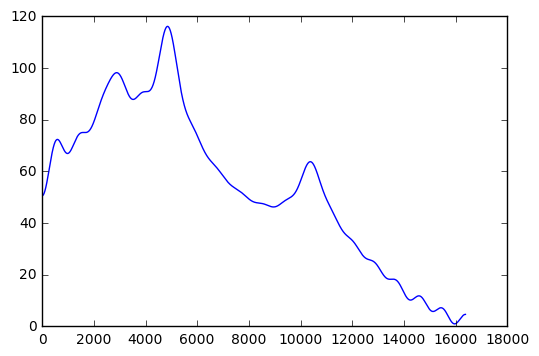

In [7]:
raised_env = rcepenvp + 1 - rcepenvp.min()
plt.plot(raised_env)
plt.show()

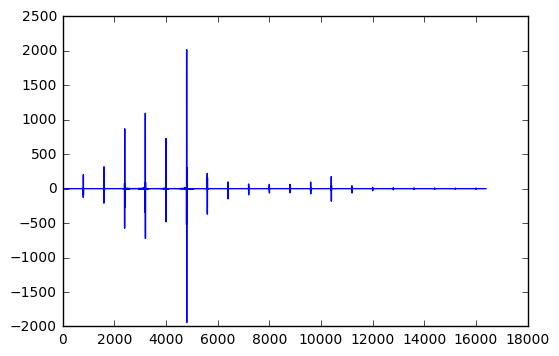

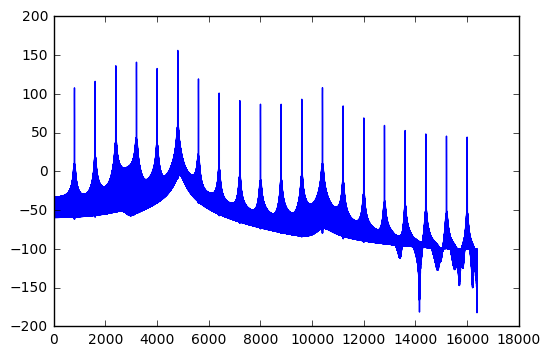

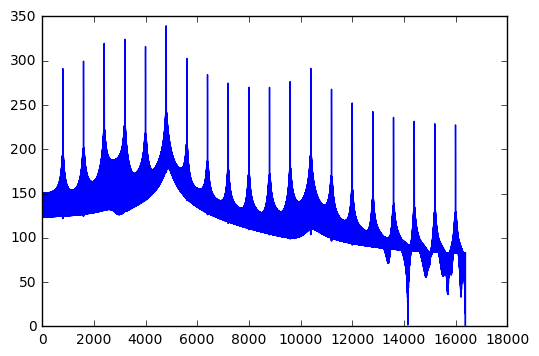

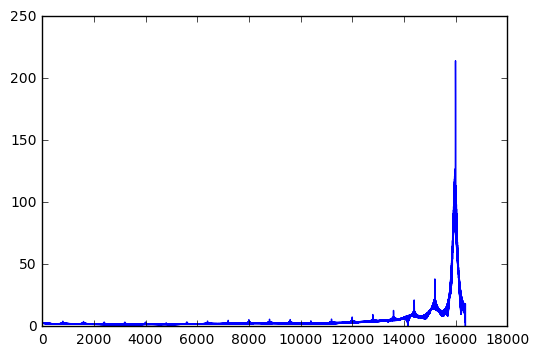

In [113]:
plt.plot(sspec[:16385])
plt.show()

plt.plot(dbsspecfull[:16385])
plt.show()

raised_db = dbsspecfull + 1 - dbsspecfull.min()
plt.plot(raised_db[:16385])
plt.show()

plt.plot(raised_db[:16385]/raised_env)
plt.show()

In [49]:
conv = sp.signal.convolve(mod, car[:49134], mode='same')
# print len(conv)
Audio(conv, rate=sr)

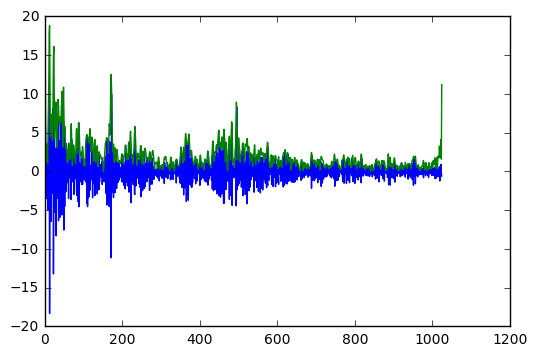

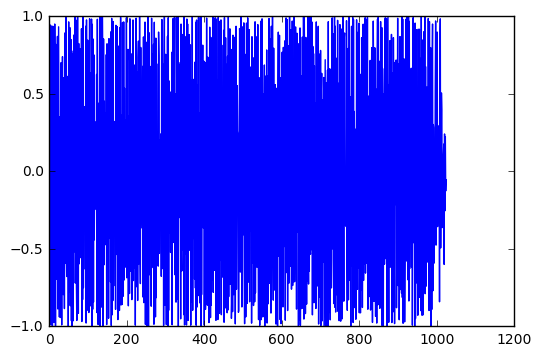

In [9]:
plt.plot(np.real(modstft[:,1]))
plt.plot(np.abs(hilbert(np.real(modstft[:,1]))))

plt.show()

plt.plot(np.real(modstft[:,1]) / np.abs(hilbert(np.real(modstft[:,1]))))
plt.show()

### Playing with stft's

In [48]:
# hop_length = 2048

# modstft = librosa.core.stft(mod, 2048, 1024)
# log_spectrogram = librosa.logamplitude(np.abs(carstft**2), ref_power=np.max)
# librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length, y_axis = 'log', x_axis = 'time')
# plt.show()

# librosa.display.specshow(np.abs(carstft), sr = sr, hop_length = hop_length, y_axis = 'log', x_axis = 'time')
# plt.show()

# mod2 = librosa.core.istft(carstft, 1024)
# Audio(mod2, rate=sr)

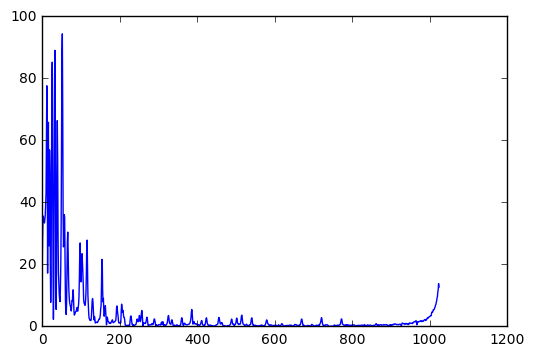

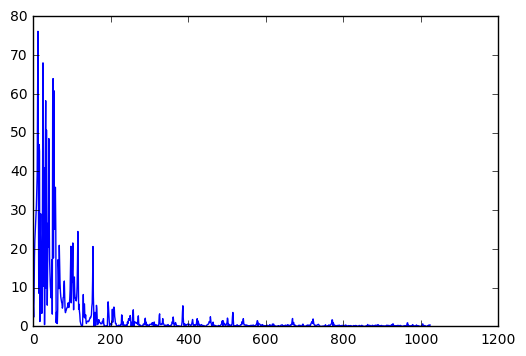

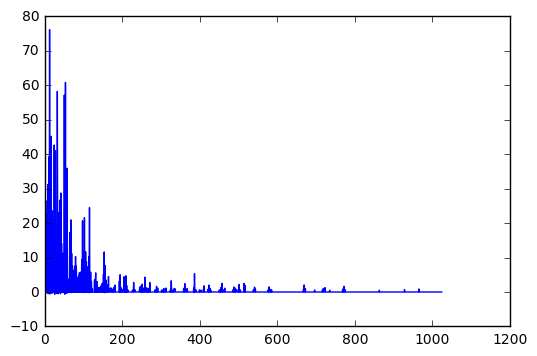

[-5.29065180 -0.00000000e+00j  2.38745403 +1.58857302e-15j
  7.80022526 -9.62227310e-16j ...,  0.17608471 -1.30679100e-15j
  0.18869515 -1.81495444e-15j -0.35592732 -0.00000000e+00j]
[ -5.29065169e-02 -0.00000000e+00j   2.38745403e+00 +1.58857302e-15j
   7.80022526e+00 -9.62227310e-16j ...,   1.76084705e-03 -1.30679093e-17j
   1.88695139e-03 -1.81495437e-17j  -3.55927320e-03 -0.00000000e+00j]


In [96]:
hilbert_env= np.abs(hilbert(np.real(carstft), axis=0))
hilbert_env2 = hilbert(np.abs(np.real(carstft)), axis=0)

hpf_carstft = np.array(carstft)
hpf_carstft[hpf_carstft < 0.5] *= 0.01

# flat_car0 = car0/hilbert_env
# cross = flat_car0 * mod0

# plt.plot(cross)
# plt.show()

# plt.plot(car0)
# plt.show()

plt.plot(hilbert_env[:, 0])
plt.show()

plt.plot(hilbert_env2[:, 0])
plt.show()

plt.plot(hpf_carstft[:, 0])
plt.show()
print carstft[:, 0]
print hpf_carstft[:, 0]

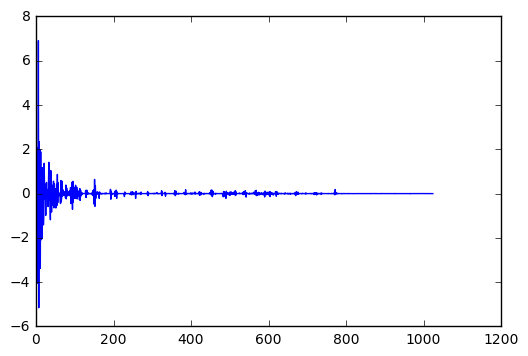

In [118]:
def cross_synthesize(mod, car):
    # takes two 1D np arrays
    # mod - the modulator signal
    # car - the carrier signal
    #
    # returns cross synthesis of the two signals
    # 
    smaller_length = min(len(mod), len(car))
    
    mod = mod[:smaller_length]
    car = car[:smaller_length]
    
    modstft = librosa.core.stft(mod, 2048, 1024)
    carstft = librosa.core.stft(car, 2048, 1024)

    car_env = hilbert(np.abs(carstft), axis=0)
    flat_car = carstft/car_env
    mod_env = np.abs(hilbert(np.abs(modstft), axis=0))
    cross = flat_car * mod_env
    result = librosa.core.stft(cross, 1024)
    
    return result

Audio(result, rate=sr)

In [119]:
min(1, 3)

1